Re-Certification (Analisis Data Olist – Customer Behavior, Sales Trend, dan Business Insight)

# Data Preparation
- Koneksi database SQL to python
- Load dataset
- Merged data

In [2]:
#import Library
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Koneksi ke Database SQLite
conn = sqlite3.connect('foo.db')
cursor = conn.cursor()

# Import datset
customers = pd.read_sql_query("SELECT * FROM customers", conn)
geolocation = pd.read_sql_query("SELECT * FROM geolocation", conn)
orders = pd.read_sql_query("SELECT * FROM orders", conn)
order_items = pd.read_sql_query("SELECT * FROM order_items", conn)
order_payments = pd.read_sql_query("SELECT * FROM order_payments", conn)
order_reviews = pd.read_sql_query("SELECT * FROM order_reviews", conn)
products = pd.read_sql_query("SELECT * FROM products", conn)
sellers = pd.read_sql_query("SELECT * FROM sellers", conn)
category_translation = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)

# ufeff adalah karakter tak terlihat yang kadang muncul di awal file atau Excel saat dibuka di Python
category_translation.columns = category_translation.columns.str.replace('\ufeff', '')
products = products.merge(category_translation, on='product_category_name', how='left')

# Gabungkan semua tabel utama
df_merged = orders \
    .merge(customers, on='customer_id', how='left') \
    .merge(order_items, on='order_id', how='left') \
    .merge(order_payments, on='order_id', how='left') \
    .merge(order_reviews, on='order_id', how='left') \
    .merge(products, on='product_id', how='left') \
    .merge(sellers, on='seller_id', how='left')

# Tampilkan hasil akhir
df_merged


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,268,4,500,19,8,13,housewares,09350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,268,4,500,19,8,13,housewares,09350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,03149,...,268,4,500,19,8,13,housewares,09350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,178,1,400,19,13,19,perfumery,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,232,1,420,24,19,21,auto,14840,guariba,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,...,828,4,4950,40,10,40,baby,17602,tupa,SP
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,...,500,2,13300,32,90,22,home_appliances_2,08290,sao paulo,SP
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893,1,6550,20,20,20,computers_accessories,37175,ilicinea,MG
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,...,1893,1,6550,20,20,20,computers_accessories,37175,ilicinea,MG


 STEP 4: Deal Null Values
 1. Null Value Identification
 2. Would you please describe to us, why null values happen?
 3. How to deal with our null value?

In [4]:
# Null Value Identification
# Cek jumlah NaN di setiap kolom
print(df_merged.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         997
review_score                      997
review_comment_title              997
review_comment_message            997
review_creat

# Kenapa Null Values Bisa Terjadi?
- Data belum diisi pengguna → misalnya kolom review kosong karena tidak semua customer mengisi ulasan
- Join antar tabel gagal mencocokkan key → menyebabkan nilai NaN saat merge
- Data rusak atau hilang saat pengumpulan (corrupt/incomplete)
- Tidak semua item punya atribut tertentu → misalnya tidak semua produk punya tinggi/lebar

In [6]:
# 4.3 How to Deal With Null Values
# Mengisi nilai null pada kolom numerik dengan 0
df_merged = df_merged.fillna({col: 0 for col in df_merged.select_dtypes(include=['int64', 'float64']).columns})

# Mengisi nilai null pada kolom kategorikal dengan 'unknown'
df_merged = df_merged.fillna({col: 'unknown' for col in df_merged.select_dtypes(include='object').columns})

# Menampilkan jumlah null value pada setiap kolom
df_merged.isnull().sum()


order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_nam

# STEP 5: Add columns
 1. Add columns based onthe time period from the order purchase timestamp column
 2. Add columns by year
 3. Add columns by month
 4. Add columns by name of the day
 5. Add columns by hour
 6. Add columns based on the actual price the customer purchased
 a. Total price value
 b. Total freight value
 c. Total order value (total price + total freight)
     E.g. Total Order Value
     a. Total price value = $95 (harga)
     b. Total freight value = $100 (kargo/pengantaran)
     c. Total order value = $95 + $100 = $195

In [8]:
# STEP 5: add Columns
# 5.1 Add columns based on the time period from the order purchase timestamp column
# Langkah 1 : Pastikan kolom timestamp dalam format datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# 5.2 - 5.5: Menambahkan Kolom Tahun, Bulan, Nama Hari, Jam Pembelian
# Tambahkan kolom baru
df_merged['purchase_year'] = df_merged['order_purchase_timestamp'].dt.year
df_merged['purchase_month'] = df_merged['order_purchase_timestamp'].dt.month
df_merged['purchase_month_name'] = df_merged['order_purchase_timestamp'].dt.month_name()
df_merged['purchase_day_name'] = df_merged['order_purchase_timestamp'].dt.day_name()
df_merged['purchase_hour'] = df_merged['order_purchase_timestamp'].dt.hour 

# 5.6: Menambahkan Kolom Harga
# Konversi kolom price dan freight_value bertipe numerik
df_merged['price'] = pd.to_numeric(df_merged['price'], errors='coerce')
df_merged['freight_value'] = pd.to_numeric(df_merged['freight_value'], errors='coerce')

# Menambahkan kolom Total Order Value
df_merged['Total_Order_Value'] = df_merged['price'] + df_merged['freight_value']

# Tampilkan semua hasil
# Output Column 5 (Add column)
df_merged[['order_id', 'order_purchase_timestamp',
           'purchase_year', 'purchase_month_name',
           'purchase_day_name', 'purchase_hour',
           'price', 'freight_value', 'Total_Order_Value']].drop_duplicates()

,order_id,order_purchase_timestamp,purchase_year,purchase_month_name,purchase_day_name,purchase_hour,price,freight_value,Total_Order_Value
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017,October,Monday,10,29.99,8.72,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018,July,Tuesday,20,118.70,22.76,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018,August,Wednesday,8,159.90,19.22,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017,November,Saturday,19,45.00,27.20,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018,February,Tuesday,21,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...
119137,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017,March,Thursday,9,72.00,13.08,85.08
119138,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018,February,Tuesday,12,174.90,20.10,195.00
119139,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017,August,Sunday,14,205.99,65.02,271.01
119140,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018,January,Monday,21,179.99,40.59,220.58


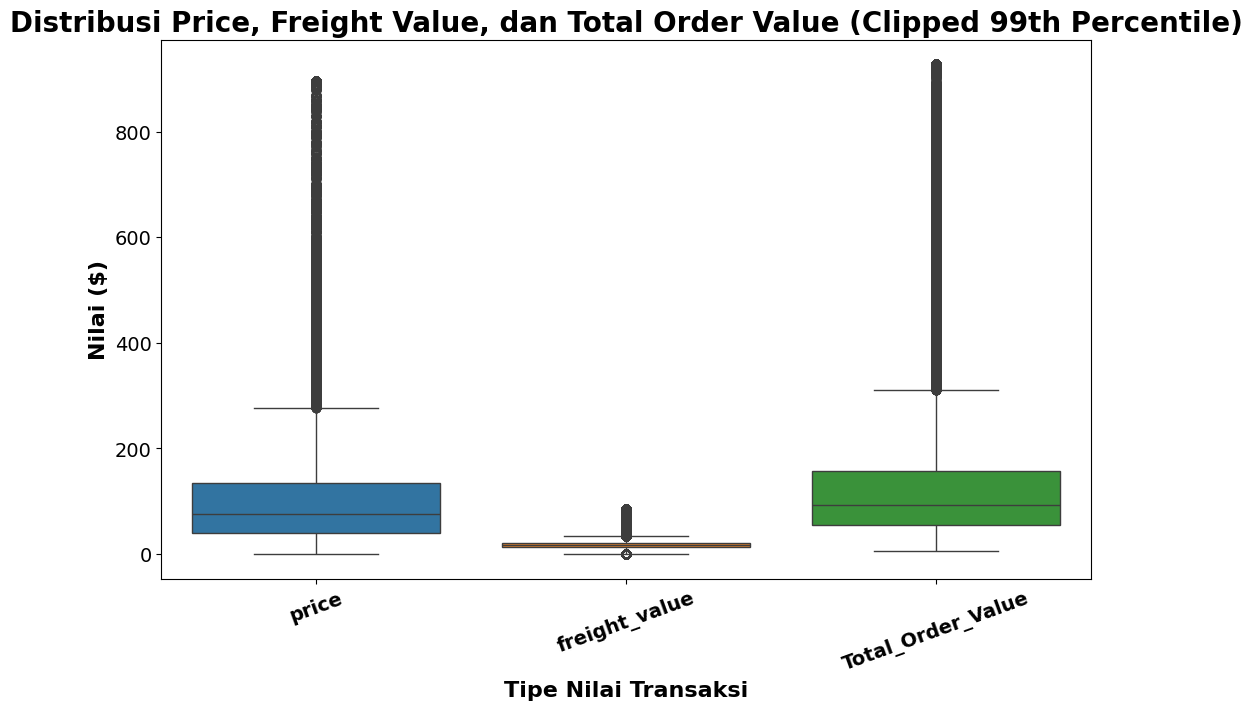

In [10]:
# VIsualisasi DIstribusi Transaksi Pelanggan

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Hapus NaN
df_viz = df_merged[['price', 'freight_value', 'Total_Order_Value']].dropna()

# Clipping (99th Percentile)
df_viz_clip = df_viz.copy()
for col in df_viz_clip.columns:
    upper = df_viz_clip[col].quantile(0.99)  # ambil 99th percentile
    df_viz_clip[col] = np.where(df_viz_clip[col] > upper, upper, df_viz_clip[col])

# Visualisasi Plot hasil clipping
plt.figure(figsize=(12,7))
sns.boxplot(data=df_viz_clip)
plt.title("Distribusi Price, Freight Value, dan Total Order Value (Clipped 99th Percentile)", fontsize=20, fontweight='bold')

# Label sumbu
plt.xlabel("Tipe Nilai Transaksi", fontsize=16, fontweight='bold')
plt.ylabel("Nilai ($)", fontsize=16, fontweight='bold')

# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=14, fontweight='bold', rotation=20)  
plt.yticks(fontsize=14)

plt.show()


# Insight: Distribusi Nilai Transaksi Pelanggan¶
- Mayoritas transaksi punya harga produk (price) di bawah 200-300.
- freight_value umumnya di bawah ±50.
- Total_Order_Value mengikuti pola price karena freight_value relatif kecil.
- Mayoritas pendapatan berasal dari banyaknya pembelian kecil dengan ongkir rendah.

# STEP 6: Customer Demographic

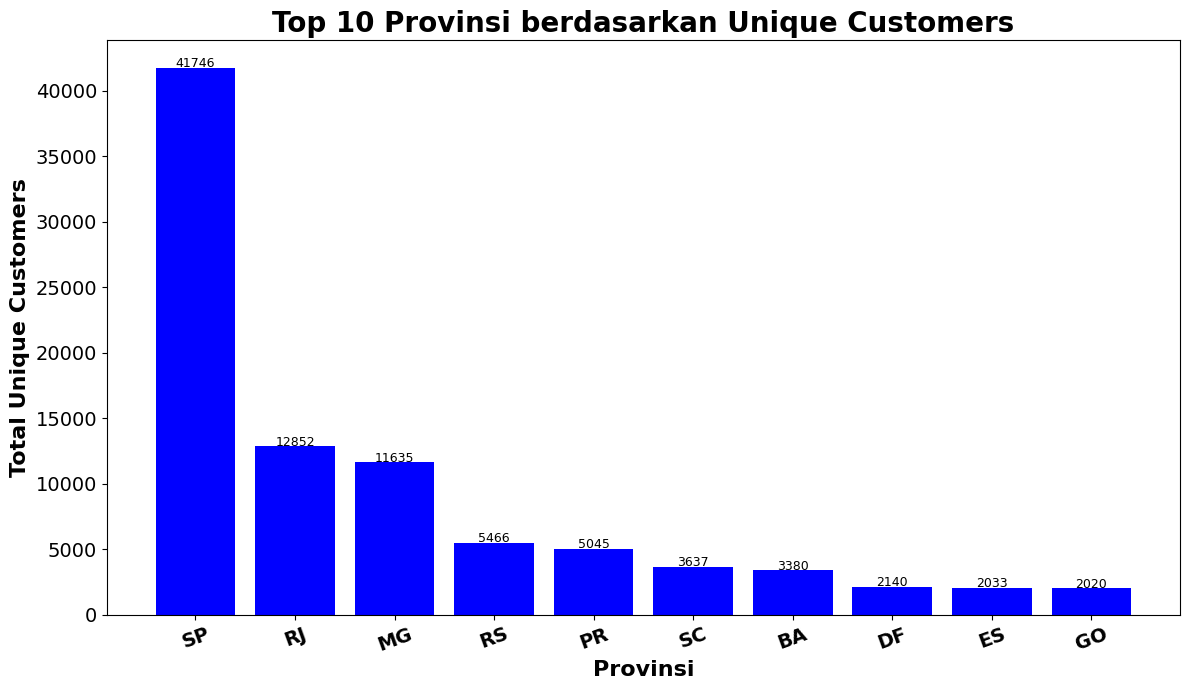

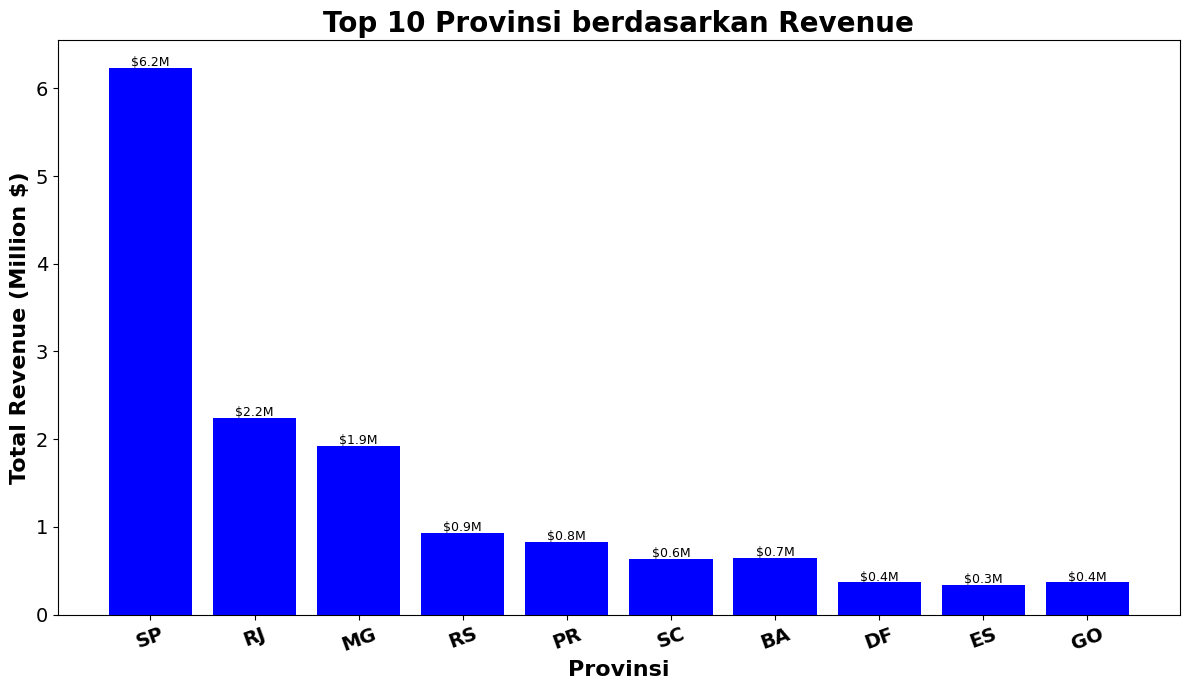

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# STEP 6.1 : Customer Demographic
# Ubah nama kolom
df_merged.rename(columns={'customer_state': 'address_static', 'customer_city': 'address_city'}, inplace=True)

# Hitung revenue per order
df_merged['revenue'] = df_merged['price'] + df_merged['freight_value']

# Hitung jumlah unique customer per provinsi
state_grouping = df_merged.groupby('address_static')['customer_id'].nunique().reset_index()
state_grouping.rename(columns={'customer_id': 'total_unique_customers'}, inplace=True)

# Hitung total revenue per provinsi
state_revenue = df_merged.groupby('address_static')['revenue'].sum().reset_index()
state_revenue.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Gabungkan unique customer & total revenue per provinsi
state_summary = state_grouping.merge(state_revenue, on='address_static')

# Ambil 10 provinsi dengan unique customer terbanyak
top_state = state_summary.nlargest(10, 'total_unique_customers')

# Visualisasi
import matplotlib.pyplot as plt
import numpy as np

# Plot 1: Unique Customers per Provinsi
plt.figure(figsize=(12,7))
plt.bar(top_state['address_static'], top_state['total_unique_customers'], color='blue')
for i, val in enumerate(top_state['total_unique_customers']):
    plt.text(i, val + 50, str(val), ha='center', fontsize=9)
plt.title("Top 10 Provinsi berdasarkan Unique Customers", fontsize=20, fontweight='bold')
plt.xlabel("Provinsi", fontsize=16, fontweight='bold')
plt.ylabel("Total Unique Customers", fontsize=16, fontweight='bold')

# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=14, fontweight='bold', rotation=20)  
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

#Plot 2: Revenue per Provinsi
plt.figure(figsize=(12,7))
plt.bar(top_state['address_static'], top_state['total_revenue']/1_000_000, color='blue')
for i, val in enumerate(top_state['total_revenue']/1_000_000):
    plt.text(i, val + 0.02, f"${val:,.1f}M", ha='center', fontsize=9)
plt.title("Top 10 Provinsi berdasarkan Revenue",fontsize=20, fontweight='bold')
plt.xlabel("Provinsi",fontsize=16, fontweight='bold')
plt.ylabel("Total Revenue (Million $)", fontsize=16, fontweight='bold')

# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=14, fontweight='bold', rotation=20)  
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()




# Inisght:

- Provinsi SP yang memperoleh Total unique customer terbanyak dikarenakan jumlah Penduduk terbanyak di Negara Brazil dan revenue tertinggi karena pusat pertumbuhan ekonomi

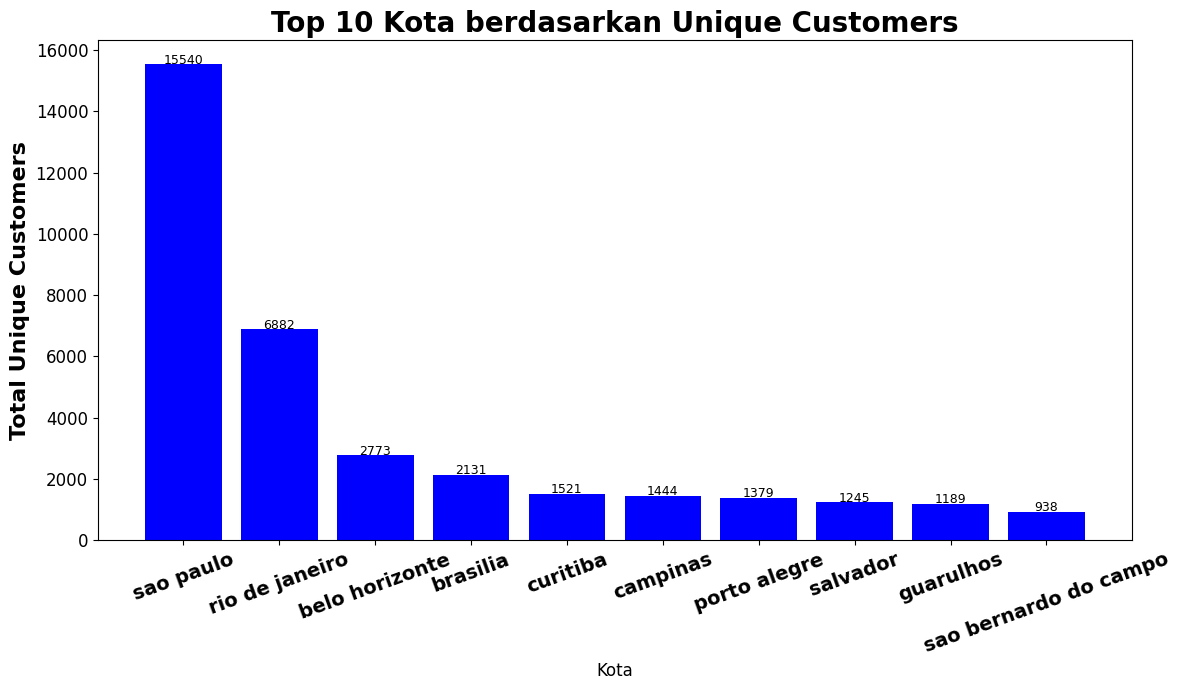

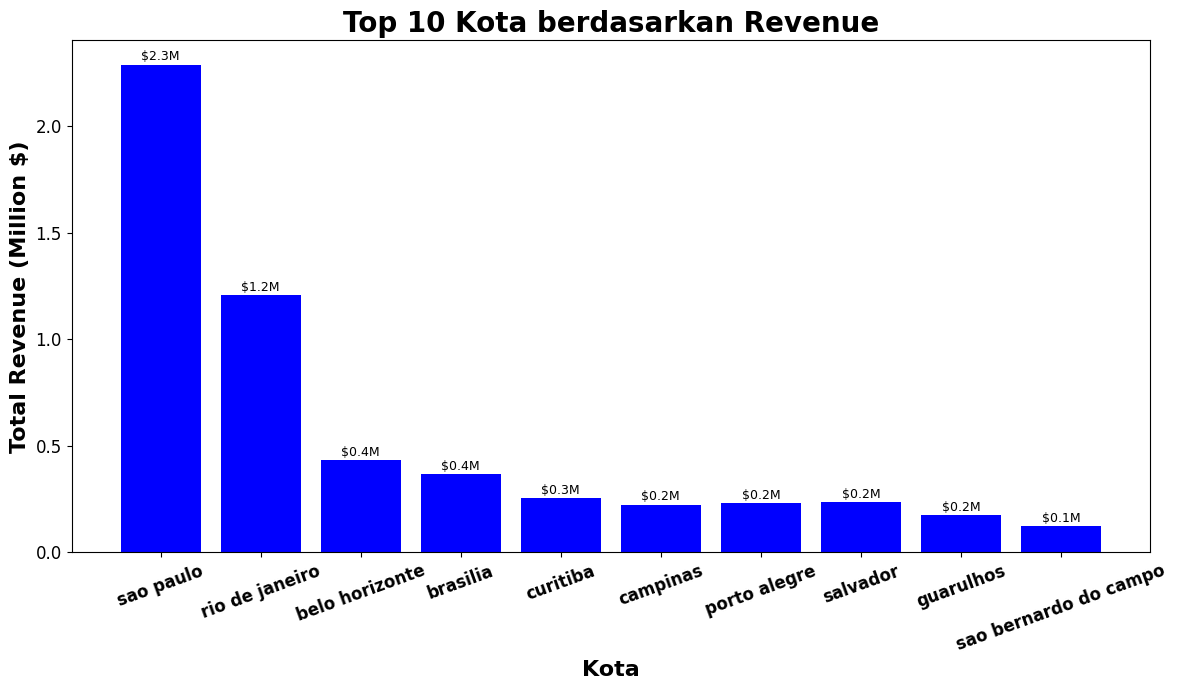

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# STEP 6.2: Customer Demographic Berdasarkan Kota

# Hitung revenue per order sudah ada di df_merged
# df_merged['revenue'] = df_merged['price'] + df_merged['freight_value']

# Hitung jumlah unique customer per kota
city_grouping = df_merged.groupby('address_city')['customer_id'].nunique().reset_index()
city_grouping.rename(columns={'customer_id': 'total_unique_customers'}, inplace=True)

# Hitung total revenue per kota
city_revenue = df_merged.groupby('address_city')['revenue'].sum().reset_index()
city_revenue.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Gabungkan unique customer & total revenue per kota
city_summary = city_grouping.merge(city_revenue, on='address_city')

# Ambil 10 kota dengan unique customer terbanyak
top_cities = city_summary.nlargest(10, 'total_unique_customers')

# Visualisasi
import matplotlib.pyplot as plt

# Plot 1: Unique Customers per Kota
plt.figure(figsize=(12,7))
plt.bar(top_cities['address_city'], top_cities['total_unique_customers'], color='blue')
for i, val in enumerate(top_cities['total_unique_customers']):
    plt.text(i, val + 20, str(val), ha='center', fontsize=9)
plt.title("Top 10 Kota berdasarkan Unique Customers", fontsize=20, fontweight='bold')
plt.xlabel("Kota", fontsize=12,)
plt.ylabel("Total Unique Customers", fontsize=16, fontweight='bold')
# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=14, fontweight='bold', rotation=20)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Revenue per Kota
plt.figure(figsize=(12,7))
plt.bar(top_cities['address_city'], top_cities['total_revenue']/1_000_000, color='blue')
for i, val in enumerate(top_cities['total_revenue']/1_000_000):
    plt.text(i, val + 0.02, f"${val:,.1f}M", ha='center', fontsize=9)
plt.title("Top 10 Kota berdasarkan Revenue", fontsize=20, fontweight='bold')
plt.xlabel("Kota", fontsize=16, fontweight='bold')
plt.ylabel("Total Revenue (Million $)", fontsize=16, fontweight='bold')
# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=12, fontweight='bold', rotation=20)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Insight
- Kota yang paling tertinggi memperoleh Total unique customer ialah kota saopaulo dan kota rio de janeiro

In [16]:
# 6.3 Hitung total pesanan per customer
customer_orders = df_merged.groupby('customer_unique_id').size().reset_index(name='total_orders')

# Tambahkan kolom frekuensi (sedikit vs banyak)
customer_orders['frekuensi'] = customer_orders['total_orders'].apply(
    lambda x: 'a little' if x <= 5 else 'a lot'
)

# Tampilkan tabel hasil
import pandas as pd
pd.set_option('display.max_rows', 10)  # biar gak terlalu panjang
customer_orders.head(10)


,customer_unique_id,total_orders,frekuensi
0,0000366f3b9a7992bf8c76cfdf3221e2,1,a little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,a little
2,0000f46a3911fa3c0805444483337064,1,a little
3,0000f6ccb0745a6a4b88665a16c9f078,1,a little
4,0004aac84e0df4da2b147fca70cf8255,1,a little
5,0004bd2a26a76fe21f786e4fbd80607f,1,a little
6,00050ab1314c0e55a6ca13cf7181fecf,1,a little
7,00053a61a98854899e70ed204dd4bafe,2,a little
8,0005e1862207bf6ccc02e4228effd9a0,1,a little
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,a little


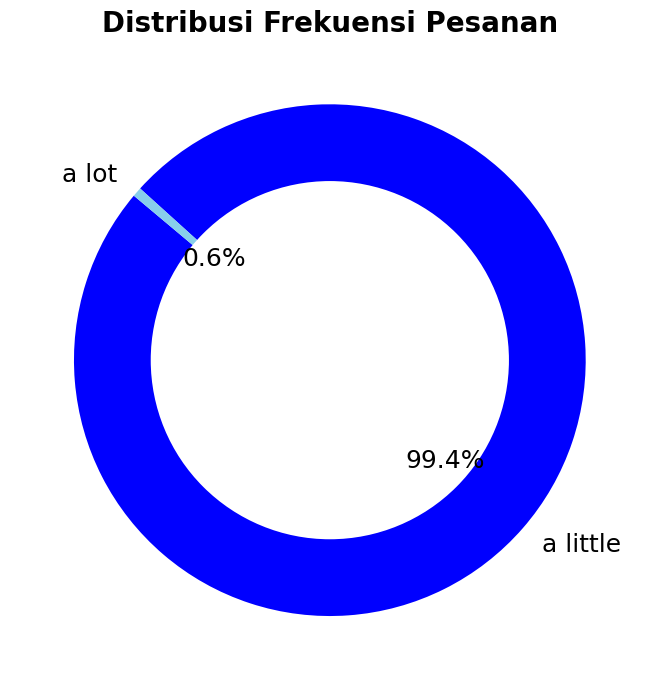

In [20]:
# 6.3 Menghitung total pesanan untuk setiap customer_unique_id
# Total pesanan (berapa kali belanja) --> contoh Customer belanja 10 kali
customer_orders = df_merged.groupby('customer_unique_id').size().reset_index(name='total_orders')

# Menambahkan kolom deskripsi frekuensi pesanan
customer_orders['frekuensi'] = customer_orders['total_orders'].apply(
    lambda x: 'a little' if x <= 5 else 'a lot'
)

# Menghitung distribusi frekuensi pesanan (sedikit vs banyak)
frequency_distribution = customer_orders['frekuensi'].value_counts()

# Visualisasi distribusi frekuensi pesanan (Donut Chart)
plt.figure(figsize=(7,7))
plt.pie(
    frequency_distribution, 
    labels=frequency_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['blue', 'skyblue'],
    wedgeprops={'width':0.4},
    textprops={'fontsize':18, 'color':'black'}  # atur ukuran & warna teks
)

# Tambahkan lingkaran putih di tengah
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribusi Frekuensi Pesanan', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()


# Insight: 
- Mayoritas Pelanggan dengan nilai 99,4% masih di kategorikan "Pengorderan nya sedikit" (Order < 5 pesanan)

In [22]:
# 6.4 Tabel tanggal pembelian pertama & terakhir per customer
purchase_dates = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].agg(
    first_purchase='min',
    last_purchase='max'
).reset_index()

# Gabungkan dengan tabel total pesanan (hasil 6.3)
combined_data = pd.merge(customer_orders, purchase_dates, on='customer_unique_id')

# Hitung selisih hari (last - first purchase)
combined_data['days_difference'] = (
    pd.to_datetime(combined_data['last_purchase']) - 
    pd.to_datetime(combined_data['first_purchase'])
).dt.days

# Tampilkan contoh tabel
import pandas as pd
pd.set_option('display.max_rows', 10)  # batasi tampilan
combined_data.head(10)


,customer_unique_id,total_orders,frekuensi,first_purchase,last_purchase,days_difference
0,0000366f3b9a7992bf8c76cfdf3221e2,1,a little,2018-05-10 10:56:27,2018-05-10 10:56:27,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,a little,2018-05-07 11:11:27,2018-05-07 11:11:27,0
2,0000f46a3911fa3c0805444483337064,1,a little,2017-03-10 21:05:03,2017-03-10 21:05:03,0
3,0000f6ccb0745a6a4b88665a16c9f078,1,a little,2017-10-12 20:29:41,2017-10-12 20:29:41,0
4,0004aac84e0df4da2b147fca70cf8255,1,a little,2017-11-14 19:45:42,2017-11-14 19:45:42,0
5,0004bd2a26a76fe21f786e4fbd80607f,1,a little,2018-04-05 19:33:16,2018-04-05 19:33:16,0
6,00050ab1314c0e55a6ca13cf7181fecf,1,a little,2018-04-20 12:57:23,2018-04-20 12:57:23,0
7,00053a61a98854899e70ed204dd4bafe,2,a little,2018-02-28 11:15:41,2018-02-28 11:15:41,0
8,0005e1862207bf6ccc02e4228effd9a0,1,a little,2017-03-04 23:32:12,2017-03-04 23:32:12,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,a little,2018-03-12 15:22:12,2018-03-12 15:22:12,0


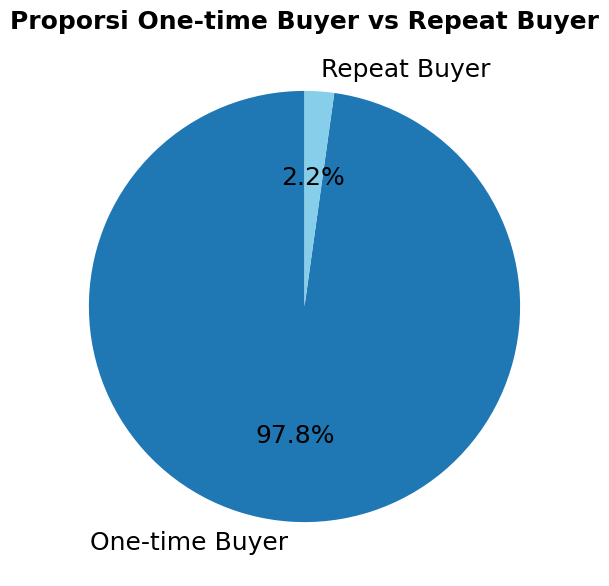

In [24]:
# 6.4 Mendapatkan tanggal pembelian pertama dan terakhir
purchase_dates = df_merged.groupby('customer_unique_id')['order_purchase_timestamp'].agg(
    first_purchase='min',
    last_purchase='max'
).reset_index()

# Menggabungkan tabel tanggal pembelian dengan total pesanan
combined_data = pd.merge(customer_orders, purchase_dates, on='customer_unique_id')

# Menambahkan kolom selisih hari antara pembelian terakhir dan pertama
combined_data['days_difference'] = (pd.to_datetime(combined_data['last_purchase']) - 
                                    pd.to_datetime(combined_data['first_purchase'])).dt.days

# Buat kategori
combined_data['buyer_type'] = np.where(combined_data['days_difference'] == 0, 
                                       'One-time Buyer', 
                                       'Repeat Buyer')

# Hitung jumlah
buyer_counts = combined_data['buyer_type'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(7,7))
colors = ['#1f77b4', '#87ceeb']  # warna biar beda jelas
plt.pie(buyer_counts, labels=buyer_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize':18,})

plt.title("Proporsi One-time Buyer vs Repeat Buyer", fontsize=18, fontweight='bold')
plt.show()



 # STEP 7: Order Behaviour

In [26]:
# STEP 7.1 ORDER BEHAVIOUR
# Total barang (berapa banyak item dibeli) --> contoh Customer beli total 30 item

# Tujuan buat tabel yang menghitung:
# 1. Rata-Rata jumlah item yang dipesan tiap customer
# 2. Tambahkan kolom yang menjelaskan frekuensi order (sedikit/banyak) berdasarkan total pesanan per customer

# 7.1 menghitung rata-rata jumlah item yang dipesan berdasarkan total pelanggan, lalu tambahkan kolom yang menjelaskan frekuensi pemesanan untuk setiap pelanggan (dengan asumsi: sedikit jika kurang dari 5, banyak jika sebaliknya).
# Konversi order_item_id bertipe numerik dan tanpa NaN
df_merged["order_item_id"] = pd.to_numeric(df_merged["order_item_id"], errors="coerce").fillna(0)

# Menghitung jumlah total item yang dipesan oleh setiap pelanggan unik
order_summary = df_merged.groupby("customer_unique_id")["order_item_id"].sum().reset_index()

# Menambahkan kolom kategori berdasarkan jumlah item yang dipesan
order_summary["order_frequency"] = order_summary["order_item_id"].apply(lambda x: "a little " if x < 5 else "a lot")

# Menampilkan hasil
order_summary.head()


,customer_unique_id,order_item_id,order_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,a little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,a little
2,0000f46a3911fa3c0805444483337064,1.0,a little
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,a little
4,0004aac84e0df4da2b147fca70cf8255,1.0,a little


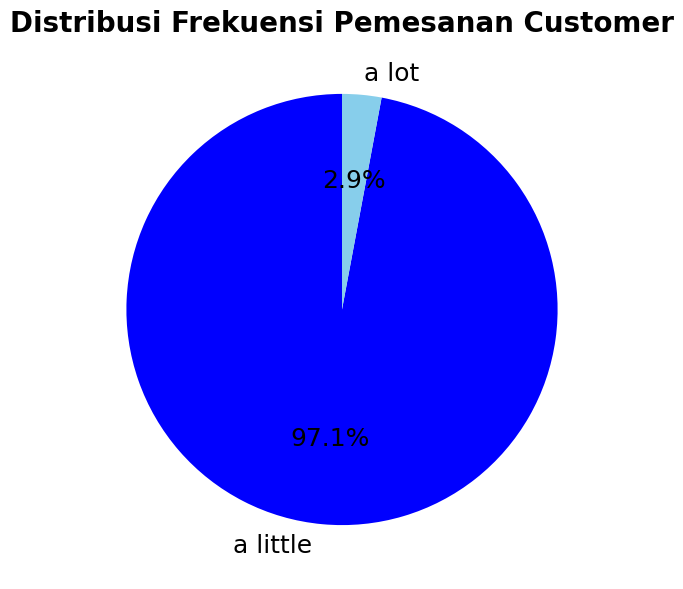

In [28]:
# Visualisasi Distribusi Pemesanan Customer
import matplotlib.pyplot as plt

# Hitung jumlah pelanggan per kategori
freq_counts = order_summary["order_frequency"].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    freq_counts, 
    labels=freq_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=["blue", "skyblue"], 
    textprops={'fontsize':18,}  # font lebih besar & tebal
)
plt.title("Distribusi Frekuensi Pemesanan Customer", fontsize=20, weight='bold')
plt.show()



In [ ]:
# Insight

97,1% pelanggan melakukan kurang dari 5 kali pemesanan, dengan sebagian besar hanya membeli sekali saja.
Implikasi: Pertumbuhan sangat bergantung pada akuisisi pelanggan baru, sementara tingkat retensi masih sangat rendah.

In [97]:
# 7.2 menghitung rata-rata berat item dan standar deviasi berat item
# Konversi kolom berat produk bertipe numerik dan tidak ada NaN
df_merged["product_weight_g"] = pd.to_numeric(df_merged["product_weight_g"], errors="coerce").fillna(0)

# Menghitung rata-rata dan standar deviasi berat produk
weight_summary = df_merged.groupby("product_category_name_english")["product_weight_g"].agg(["mean", "std"]).reset_index()

# Mengganti nama kolom agar lebih jelas
weight_summary.columns = ["product_category_name", "average_weight", "std_weight"]

# Menampilkan hasil
weight_summary.head()

,product_category_name,average_weight,std_weight
0,agro_industry_and_commerce,4248.309524,4968.647624
1,air_conditioning,4099.688742,4178.399777
2,art,1547.369863,1417.042166
3,arts_and_craftmanship,1369.875000,1519.035143
4,audio,1213.719160,2137.153065


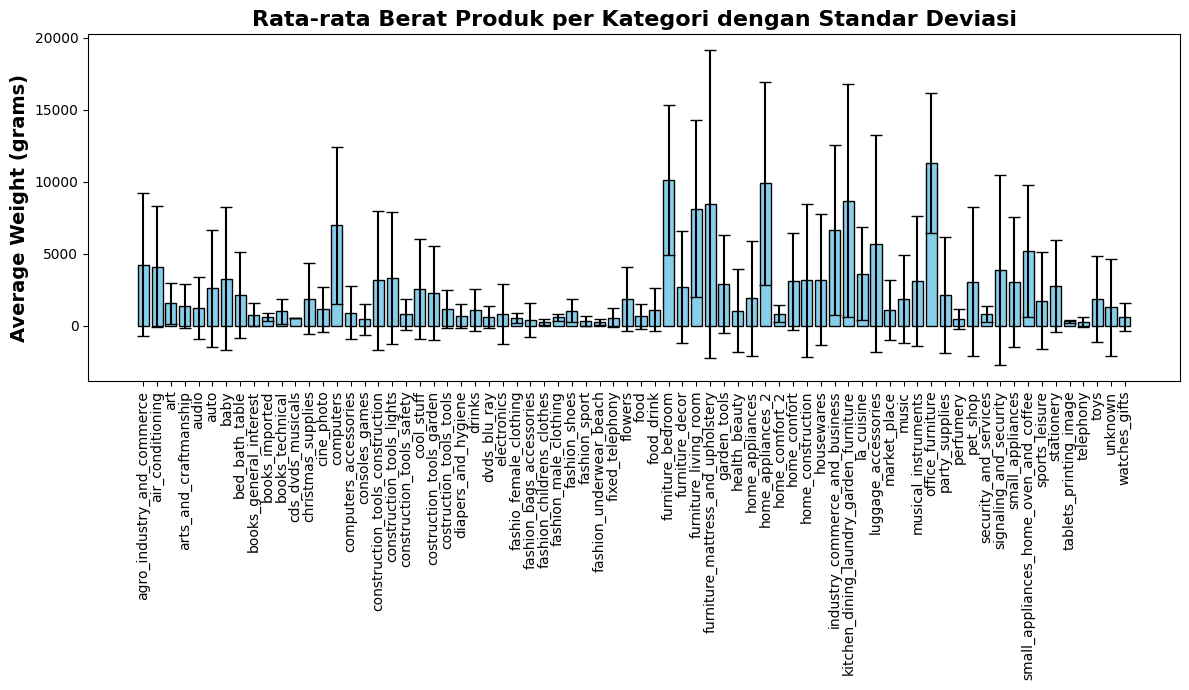

In [34]:
# Konversi kolom berat produk ke numeric
df_merged["product_weight_g"] = pd.to_numeric(df_merged["product_weight_g"], errors="coerce").fillna(0)

# Hitung rata-rata dan standar deviasi per kategori
weight_summary = df_merged.groupby("product_category_name_english")["product_weight_g"].agg(["mean", "std"]).reset_index()

# Rename kolom
weight_summary.columns = ["product_category_name", "average_weight", "std_weight"]


# Visualisasi Rata- Rata Produk per Kategori
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.bar(weight_summary["product_category_name"], 
        weight_summary["average_weight"], 
        yerr=weight_summary["std_weight"], 
        color="skyblue", edgecolor="black", capsize=4)

plt.xticks(rotation=90)
plt.ylabel("Average Weight (grams)", fontsize=14, fontweight='bold')
plt.title("Rata-rata Berat Produk per Kategori dengan Standar Deviasi", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


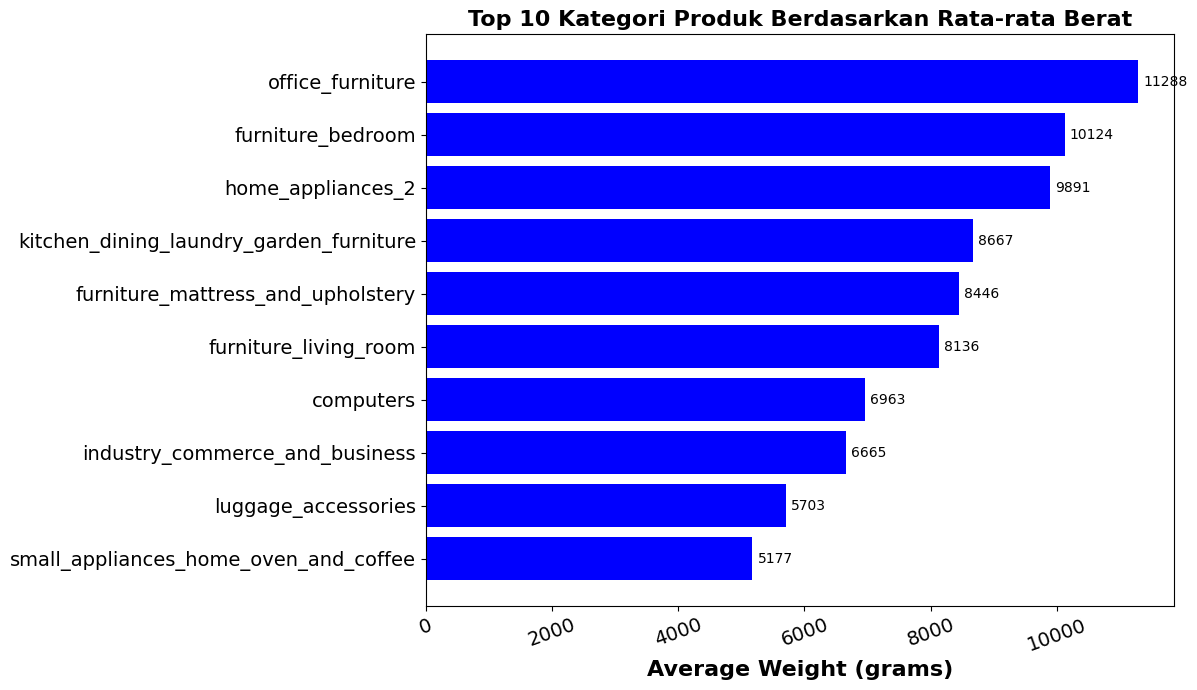

In [36]:
# VIsualisasi Top 10 Kategori produk berdasarkan rata-rata berat
import matplotlib.pyplot as plt

# Ambil 10 kategori dengan rata-rata berat tertinggi
top10_weight = weight_summary.sort_values("average_weight", ascending=False).head(10)

plt.figure(figsize=(12,7))
bars = plt.barh(top10_weight["product_category_name"], 
                top10_weight["average_weight"], 
                color="blue")

# Tambahkan label angka di setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 80,                # posisi X (geser sedikit ke kanan)
             bar.get_y() + bar.get_height()/2,  # posisi Y (tengah bar)
             f"{width:.0f}",            # format angka tanpa desimal
             va="center")

plt.xlabel("Average Weight (grams)", fontsize=16, fontweight='bold')
plt.title("Top 10 Kategori Produk Berdasarkan Rata-rata Berat", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Biar urut dari terbesar ke atas
# Perbesar angka tick di sumbu X & Y
plt.xticks(fontsize=14, rotation=20)  
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


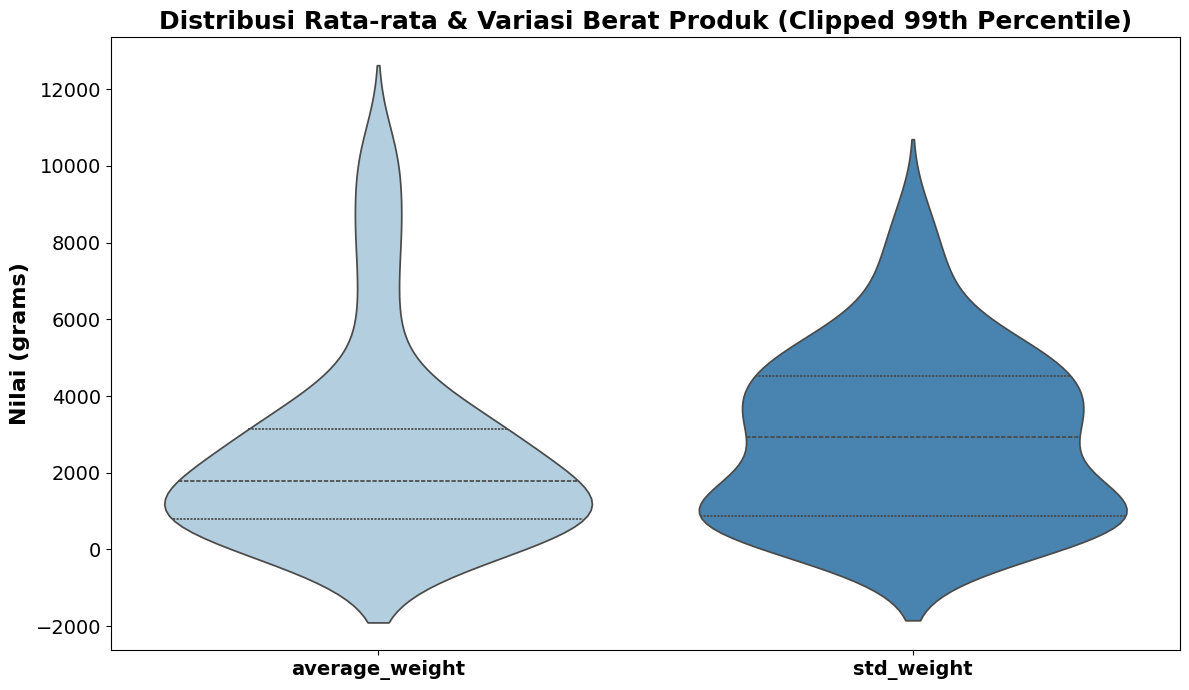

In [38]:
# Visualisasi Hubungan Rata-Rata dan Variasi Produk Barang

import seaborn as sns
import matplotlib.pyplot as plt

# Buat dataframe untuk violin plot
df_weight_viz = weight_summary[['average_weight', 'std_weight']].copy()

# Clipping outlier (99th percentile) biar distribusi lebih ramping
for col in df_weight_viz.columns:
    upper = df_weight_viz[col].quantile(0.99)
    df_weight_viz[col] = np.where(df_weight_viz[col] > upper, upper, df_weight_viz[col])

# Visualisasi violin plot
plt.figure(figsize=(12,7))
sns.violinplot(data=df_weight_viz, inner="quartile", palette="Blues")

plt.title("Distribusi Rata-rata & Variasi Berat Produk (Clipped 99th Percentile)", 
          fontsize=18, fontweight="bold")
plt.ylabel("Nilai (grams)", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14, fontweight="bold")
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


# Penjelasan
a. Bentuk violin menunjukkan kepadatan distribusi data
- Bagian yang lebih lebar artinya lebih banyak produk dengan nilai tersebut.
- Bagian yang lebih sempit artinya lebih sedikit produk 
b. Garis Horizontal di dalam violin:
- Tengah putus-putus --> median
- Atas & bawah (putus-putus --> kuartil Q1 & Q3

# Insight:
a. Average Weight: rata-rata berat produk (gram)
    - Distribusi paling banyak di bawah ±2000 gram (2 kg).
    - Ada sebagian produk berat rata-ratanya di atas 5–10 kg, tapi jarang (karena area atas violin menyempit).
b. Std Weight (Variasi Berat):variasi/penyebaran berat produk (seberapa jauh berat antar produk berbeda).
    - Sebagian besar produk punya variasi kecil (sekitar <2000 gram).
    - Ada juga produk dengan variasi besar (>4000 gram), artinya produk dalam kategori itu punya berat yang jauh berbeda (misalnya kategori furnitur atau alat berat).

# Kesimpulan:
- Mayoritas produk di e-commerce ini ringan (rata-rata ≤ 2 kg).
- Beberapa kategori punya variasi berat besar → kemungkinan kategori campuran (ada item kecil & besar dalam kategori yang sama).

In [40]:
# 7.3 menghitung waktu pemesanan yang paling sering terjadi berdasarkan bulan, hari, dan waktunya (pagi, sore, atau malam)
# Pastikan kolom timestamp sudah datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Tambah kolom bulan, hari, jam
df_merged['month'] = df_merged['order_purchase_timestamp'].dt.month_name()
df_merged['day'] = df_merged['order_purchase_timestamp'].dt.day_name()
df_merged['hour'] = df_merged['order_purchase_timestamp'].dt.hour

# Kategorikan ke pagi/siang-malam
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang/Sore'
    else:
        return 'Malam'

df_merged['time_of_day'] = df_merged['hour'].apply(get_time_of_day)

# Hitung jumlah order berdasarkan bulan, hari, dan waktu
order_group = (
    df_merged
    .groupby(['month','day','time_of_day'])
    .size()
    .reset_index(name='total_orders')
    .sort_values(by=['month','day','time_of_day'])
)

# Lihat tabel hasil pengelompokan
order_group.head(10)  # tampilkan 10 baris pertama


,month,day,time_of_day,total_orders
0,April,Friday,Malam,457
1,April,Friday,Pagi,372
2,April,Friday,Siang/Sore,531
3,April,Monday,Malam,838
4,April,Monday,Pagi,456
5,April,Monday,Siang/Sore,744
6,April,Saturday,Malam,449
7,April,Saturday,Pagi,241
8,April,Saturday,Siang/Sore,457
9,April,Sunday,Malam,778


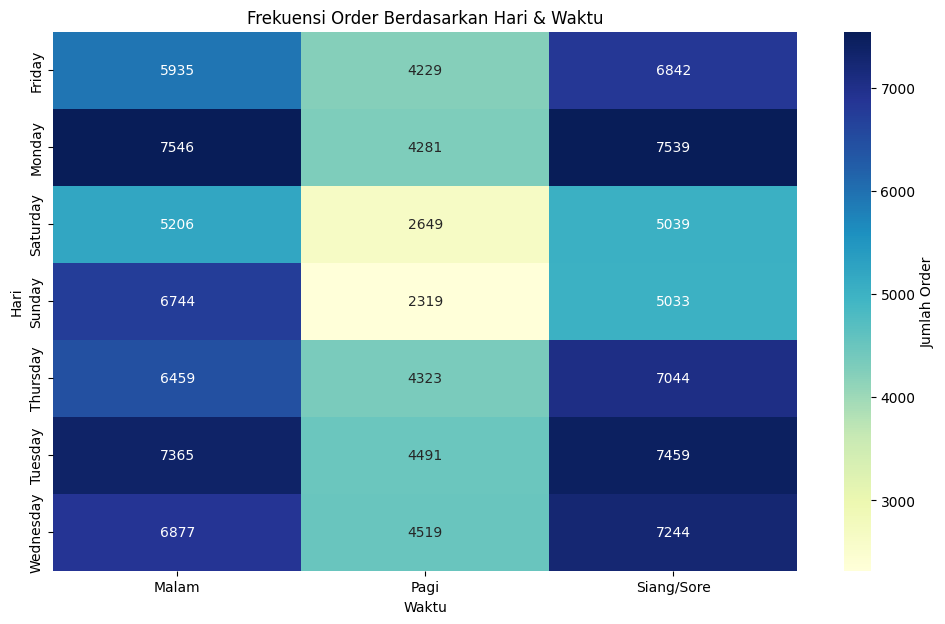

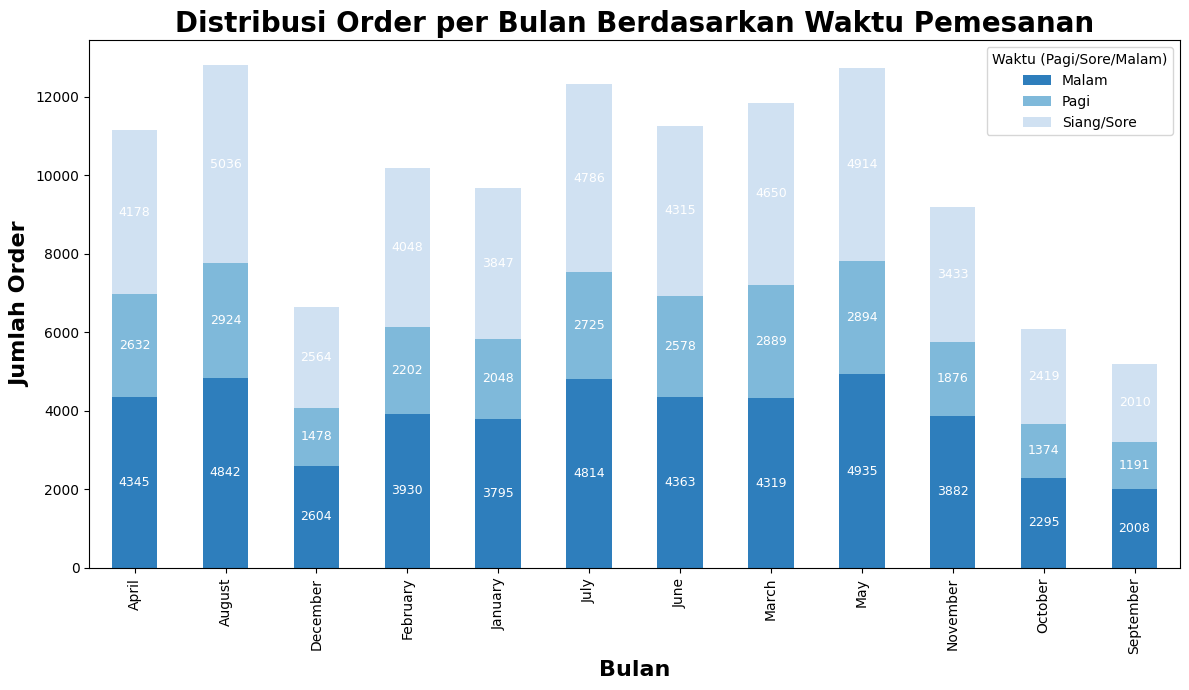

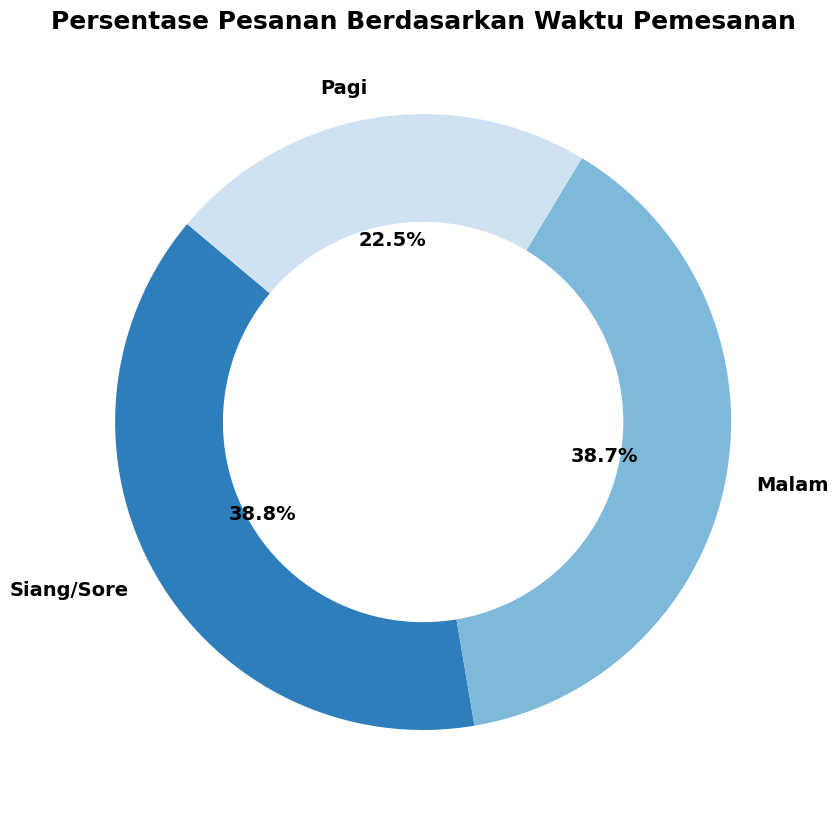

In [42]:
# Visualisasi
# Hitung jumlah order berdasarkan bulan, hari, dan waktu
order_group = (
    df_merged
    .groupby(['month','day','time_of_day'])
    .size()  # hitung jumlah order
    .reset_index(name='order_count')  # kasih nama kolom 'order_count'
)

import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. HEATMAP Hari vs Waktu ---

pivot_table = order_group.pivot_table(
    index="day", columns="time_of_day", values="order_count", aggfunc="sum"
)

plt.figure(figsize=(12,7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Jumlah Order'})
plt.title("Frekuensi Order Berdasarkan Hari & Waktu")
plt.ylabel("Hari")
plt.xlabel("Waktu")
plt.show()


# --- 2. STACKED BAR CHART Bulan vs Waktu ---
month_pivot = order_group.pivot_table(
    index="month", columns="time_of_day", values="order_count", aggfunc="sum"
)

# Ambil warna gradasi dari Blues_r sesuai jumlah kategori (kolom time_of_day)
colors = plt.cm.Blues_r(np.linspace(0.3, 0.8, month_pivot.shape[1]))

# Plot stacked bar dengan warna gradasi
ax = month_pivot.plot(
    kind="bar", stacked=True, figsize=(12,7), color=colors
)

# Tambahkan angka di dalam bar (tanpa total)
for c in ax.containers:
    ax.bar_label(c, label_type="center", color="white", fontsize=9)

plt.title("Distribusi Order per Bulan Berdasarkan Waktu Pemesanan", fontsize=20, fontweight="bold")
plt.ylabel("Jumlah Order", fontsize=16, fontweight="bold")
plt.xlabel("Bulan", fontsize=16, fontweight="bold")
plt.legend(title="Waktu (Pagi/Sore/Malam)")
plt.tight_layout()
plt.show()


# --- 3. Donut chart Persentase berdasarkan Waktu ---
# Hitung jumlah order per waktu
time_counts = df_merged['time_of_day'].value_counts()

# Ambil warna dari colormap Blues_r
colors = plt.cm.Blues_r(np.linspace(0.3, 0.8, len(time_counts)))  
# bisa atur 0.3-0.8 biar lebih kontras, coba ubah sesuai kebutuhan

plt.figure(figsize=(10,10))
plt.pie(
    time_counts, 
    labels=time_counts.index, 
    autopct='%1.1f%%',
    startangle=140,
    colors=colors, 
    wedgeprops={'width':0.4},  
    textprops={'fontsize':14, 'weight':'bold'}
)

# Buat lingkaran putih di tengah → efek donut
centre_circle = plt.Circle((0,0),0.65,fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Persentase Pesanan Berdasarkan Waktu Pemesanan", fontsize=18, weight='bold')
plt.show()


# Insight:
- Data time order behaviour menunjukkan bahwa orderan tetrtinggi ada di tahun (2018), bulan(Mei & Agustus), hari (weekdays), dan jam (10.00-22.00)/(siang/sore - malem)

In [44]:
# 7.4 Menghitung rata-rata nilai total pesanan per pesanan dan mengklasifikasikan rata-rata harga pesanan untuk setiap pelanggan dengan asumsi bahwa:
# Harga di atas 2500 disebut mahal/expensive, Harga antara 1000-2500 disebut normal, Harga di bawah 1000 disebut murah/cheap

# Hitung total order value per customer
customer_order_value = df_merged.groupby('customer_unique_id').agg({
    'Total_Order_Value': 'sum',   # total value per customer
    'order_id': 'count'            # jumlah pesanan per customer
}).reset_index()

# Hitung rata-rata nilai per order
customer_order_value['avg_order_value'] = customer_order_value['Total_Order_Value'] / customer_order_value['order_id']

# Klasifikasi berdasarkan asumsi harga
def classify_order_price(value):
    if value > 2500:
        return 'Mahal'
    elif value >= 1000:
        return 'Normal'
    else:
        return 'Murah'

customer_order_value['price_category'] = customer_order_value['avg_order_value'].apply(classify_order_price)

# Tampilkan hasil
customer_order_value.head()


,customer_unique_id,Total_Order_Value,order_id,avg_order_value,price_category
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,141.90,Murah
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,27.19,Murah
2,0000f46a3911fa3c0805444483337064,86.22,1,86.22,Murah
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,1,43.62,Murah
4,0004aac84e0df4da2b147fca70cf8255,196.89,1,196.89,Murah


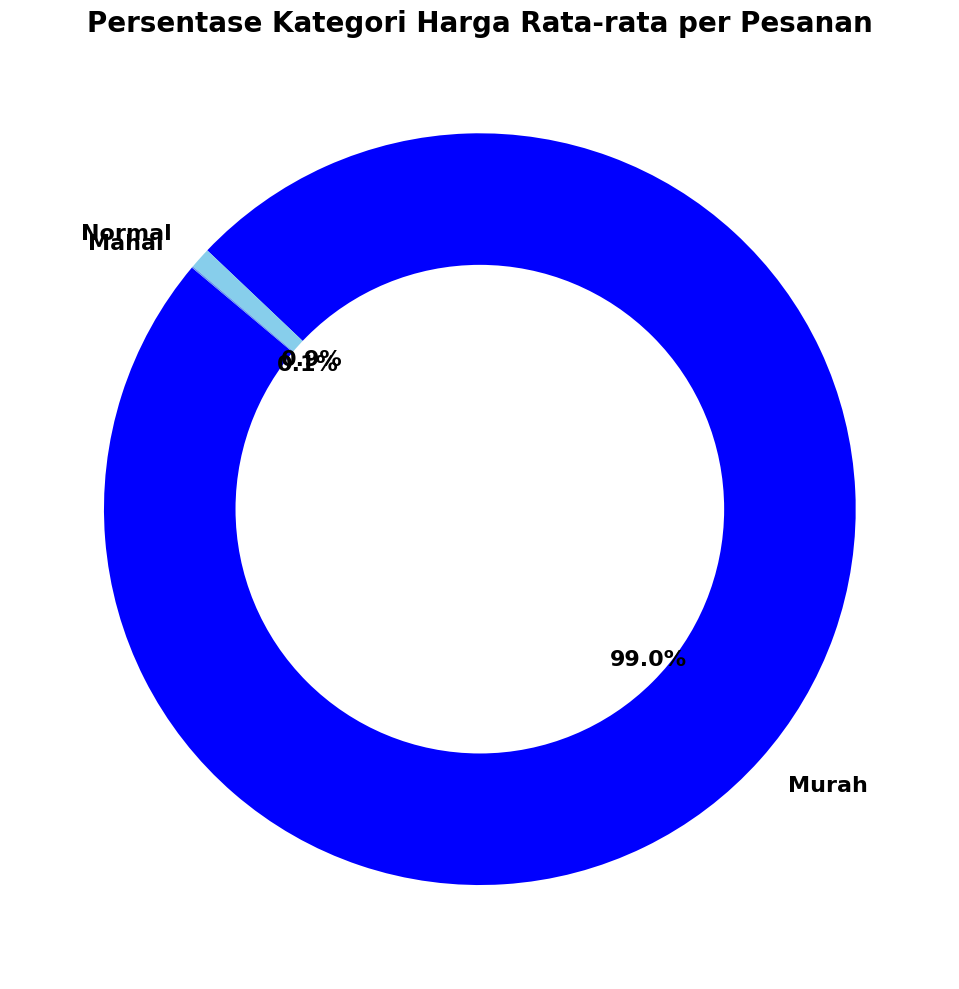

In [50]:
# Visualisasi "Persentase Kategori Harga Rata-rata per Pesanan"

# Hitung jumlah customer per kategori harga
category_counts = customer_order_value['price_category'].value_counts()

# Tentukan warna per kategori
color_map = {
    'Murah': 'blue',
    'Normal': 'skyblue',
    'Mahal': 'cornflowerblue'
}
colors = [color_map.get(cat, 'lightblue') for cat in category_counts.index]

# Donut chart
plt.figure(figsize=(10,10))  # diperbesar
plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%',
    startangle=140, 
    colors=colors, 
    wedgeprops=dict(width=0.65),
    textprops={'fontsize': 16, 'weight': 'bold'}  # perbesar font
)

# Lingkaran putih di tengah untuk donut
centre_circle = plt.Circle((0,0),0.65,fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Persentase Kategori Harga Rata-rata per Pesanan", fontsize=20, weight='bold')
plt.tight_layout()
plt.show()


# Insight:
- Mayoritas pelanggan berbelanja dengan harga murah (<$1000), menunjukkan pola transaksi bernilai kecil namun masif.

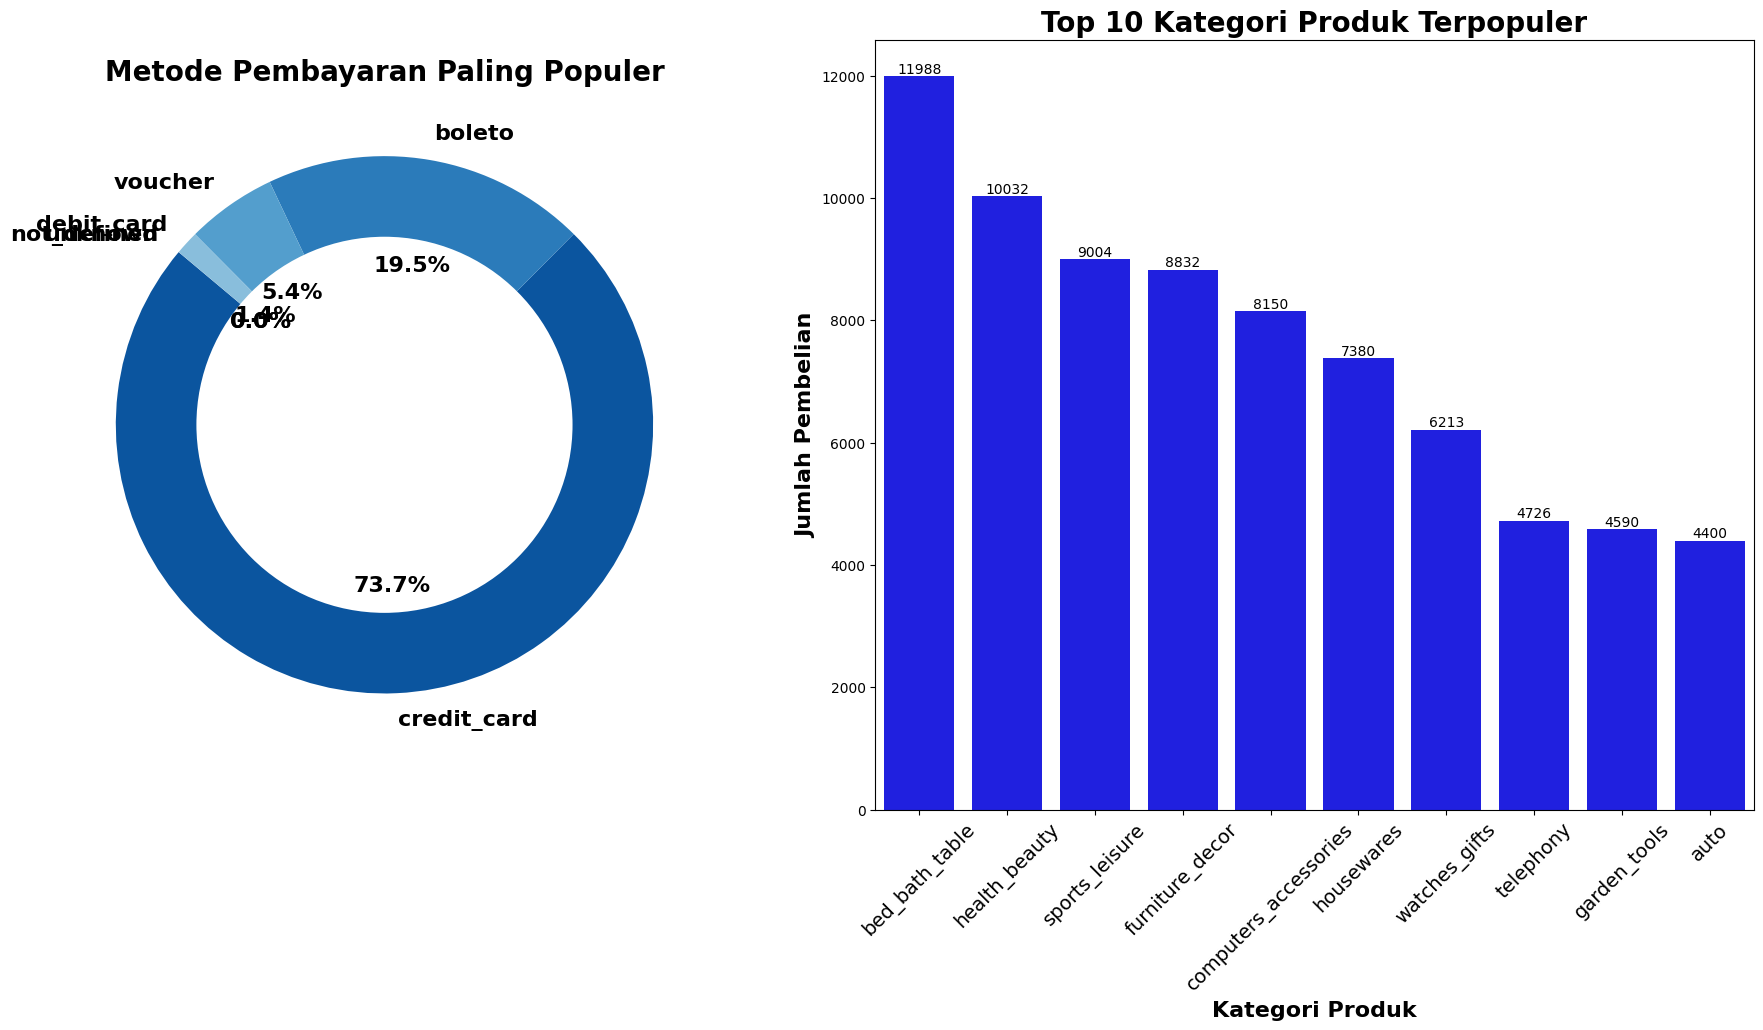

In [52]:
# 7.5 menghitung metode pembayaran yang paling populer dan preferensi kategori produk untuk setiap pelanggan.
# Menghitung metode pembayaran paling populer

import matplotlib.pyplot as plt
import seaborn as sns

# Copy dataset final
data = df_merged.copy()

# --- Data Metode Pembayaran ---
popular_payment_methods = data["payment_type"].value_counts().reset_index()
popular_payment_methods.columns = ["payment_type", "count"]

# --- Data Top Kategori Produk ---
top_categories = data["product_category_name_english"].value_counts().head(10).reset_index()
top_categories.columns = ["product_category_name_english", "count"]

# Buat figure dengan subplot proporsional
fig, axes = plt.subplots(1, 2, figsize=(22,10), gridspec_kw={'width_ratios': [1.3, 1.7]})

# --- Subplot 1: Donut Chart Metode Pembayaran ---
colors = sns.color_palette("Blues_r", len(popular_payment_methods))
wedges, texts, autotexts = axes[0].pie(
    popular_payment_methods['count'],
    labels=popular_payment_methods['payment_type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    textprops={'fontsize': 16, 'weight':'bold'}
)

# Lingkaran putih di tengah donut
centre_circle = plt.Circle((0,0),0.70, fc='white')
axes[0].add_artist(centre_circle)

# Styling label
for t in texts:
    t.set_fontsize(16)
    t.set_weight("bold")
for at in autotexts:
    at.set_fontsize(16)
    at.set_weight("bold")

axes[0].set_title("Metode Pembayaran Paling Populer", fontsize=20, weight='bold')

# --- Subplot 2: Bar Chart Top 10 Kategori Produk ---
sns.barplot(data=top_categories, x="product_category_name_english", y="count",
            color="Blue", ax=axes[1])

# Hapus grid
axes[1].grid(False)

axes[1].set_title("Top 10 Kategori Produk Terpopuler", fontsize=20, weight='bold')
axes[1].set_xlabel("Kategori Produk", fontsize=16, fontweight='bold')
axes[1].set_ylabel("Jumlah Pembelian", fontsize=16, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=14)

# Label angka di atas bar
for p in axes[1].patches:
    axes[1].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.subplots_adjust(wspace=0.2)  # beri jarak antar chart
plt.show()


# Insight: 
- Dalam metode pembayaran, credit card mendominasi, diikuti boleto, voucher, dan debit card, yang menegaskan preferensi digital payment dalam ekosistem e-commerce ini.

In [54]:
# 7.6 Apa saja kategori yang paling banyak dipesan setiap tahun dan bagaimana kategori-kategori tersebut berkembang dari tahun ke tahun?
# Menambahkan kolom tahun dari tanggal pesanan
# Konversi timestamp menjadi datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'], errors='coerce')

# Tambahkan kolom tahun
df_merged['purchase_year'] = df_merged['order_purchase_timestamp'].dt.year

# Hitung jumlah order kategori per tahun
category_year = (
    df_merged.groupby(['purchase_year', 'product_category_name_english'])
    .size()
    .reset_index(name='order_count')
)

# Ambil top 5 kategori tiap tahun
top_categories_year = (
    category_year.groupby('purchase_year', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'order_count'))
    .reset_index(drop=True)
)

top_categories_year


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\2141477721.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_year.groupby('purchase_year', group_keys=False)


,purchase_year,product_category_name_english,order_count
0,2016,furniture_decor,81
1,2016,health_beauty,53
2,2016,perfumery,36
3,2016,toys,27
4,2016,computers_accessories,24
...,...,...,...
10,2018,bed_bath_table,6206
11,2018,health_beauty,6133
12,2018,computers_accessories,4884
13,2018,sports_leisure,4677


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\2558633934.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged.groupby(['purchase_year', 'product_category_name_english'])


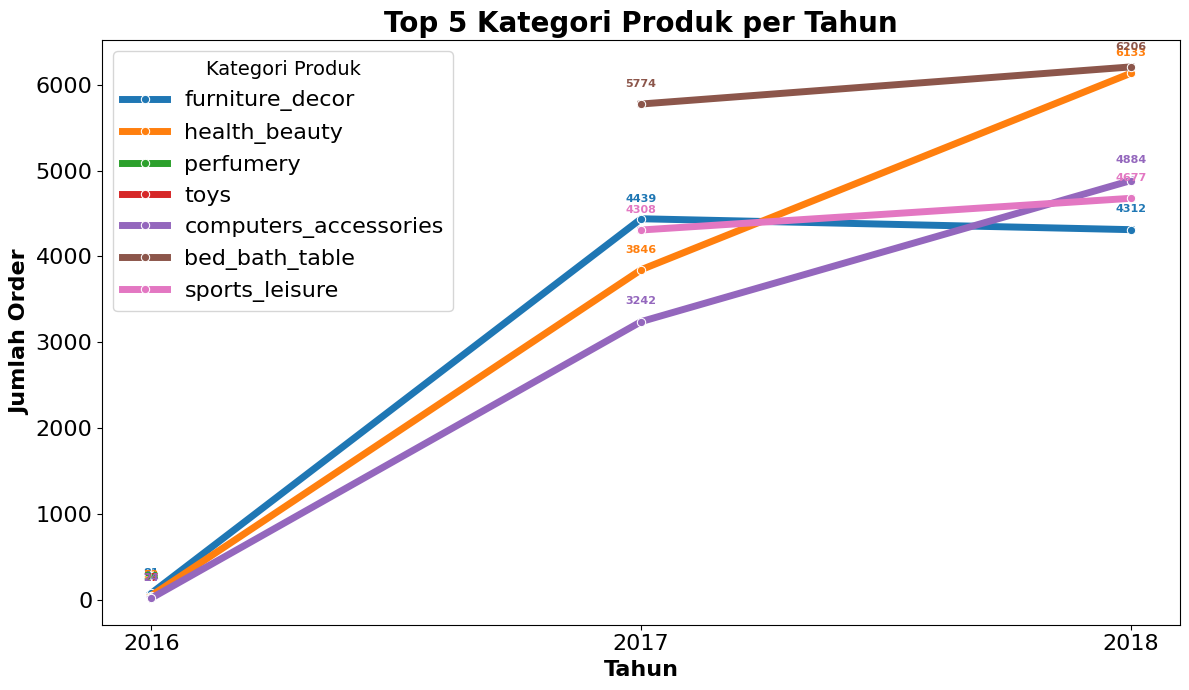

In [60]:
# Visualisasi Perkembangan top 5 kategori tiap tahun 
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil top 5 kategori tiap tahun
top_categories_year = (
    df_merged.groupby(['purchase_year', 'product_category_name_english'])
    .size()
    .reset_index(name='order_count')
    .groupby('purchase_year', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'order_count'))
    .reset_index(drop=True)
)

# Visualisasi
plt.figure(figsize=(12,7))  # canvas lebih besar
ax = sns.lineplot(
    data=top_categories_year,
    x='purchase_year',
    y='order_count',
    hue='product_category_name_english',
    marker='o',
    linewidth=5
)

# Tambahkan angka di atas tiap titik
for line in ax.get_lines():
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for x, y in zip(x_data, y_data):
        ax.text(x, y+200, f'{int(y)}', color=line.get_color(),
                fontsize=8, fontweight='bold', ha='center')

# Styling chart
plt.title("Top 5 Kategori Produk per Tahun", fontsize=20, fontweight='bold')
plt.ylabel("Jumlah Order", fontsize=16, fontweight='bold')
plt.xlabel("Tahun", fontsize=16, fontweight='bold')
plt.xticks(sorted(top_categories_year['purchase_year'].unique()), fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Kategori Produk', fontsize=16, title_fontsize=14)

plt.tight_layout()
plt.show()

# insight

- Penjualan tahunan didominasi kategori bed_bath_table, disusul health_beauty.
- Kategori computer_accessories dan sport_leisure menunjukkan tren kenaikan, meski berbeda signifikan.
- Sebaliknya, furniture_decor mengalami penurunan dari 2017 ke 2018, menandakan adanya pergeseran preferensi konsumen.

# STEP 8 REVIEW CUSTOMER

In [62]:
# Pastikan review_score numerik dan hapus NaN
df_merged["review_score"] = pd.to_numeric(df_merged["review_score"], errors="coerce")
df_merged = df_merged.dropna(subset=["review_score"])

# 1. Hitung rata-rata review score per customer
customer_reviews = df_merged.groupby('customer_unique_id')['review_score'].mean().reset_index()
customer_reviews.rename(columns={'review_score':'avg_review_score'}, inplace=True)

# 2. Tambahkan kolom tingkat kepuasan
def satisfaction_level(score):
    if score >= 4:
        return 'Satisfied'
    else:
        return 'Not Satisfied'

customer_reviews['satisfaction'] = customer_reviews['avg_review_score'].apply(satisfaction_level)

# 3. Hitung jumlah customer per tingkat kepuasan
satisfaction_counts = customer_reviews['satisfaction'].value_counts()

# 4. Lihat hasil
print(customer_reviews.head())
print("\nJumlah customer per tingkat kepuasan:")
print(satisfaction_counts)


                 customer_unique_id  avg_review_score   satisfaction
0  0000366f3b9a7992bf8c76cfdf3221e2               5.0      Satisfied
1  0000b849f77a49e4a4ce2b2a4ca5be3f               4.0      Satisfied
2  0000f46a3911fa3c0805444483337064               3.0  Not Satisfied
3  0000f6ccb0745a6a4b88665a16c9f078               4.0      Satisfied
4  0004aac84e0df4da2b147fca70cf8255               5.0      Satisfied

Jumlah customer per tingkat kepuasan:
satisfaction
Satisfied        73287
Not Satisfied    22093
Name: count, dtype: int64


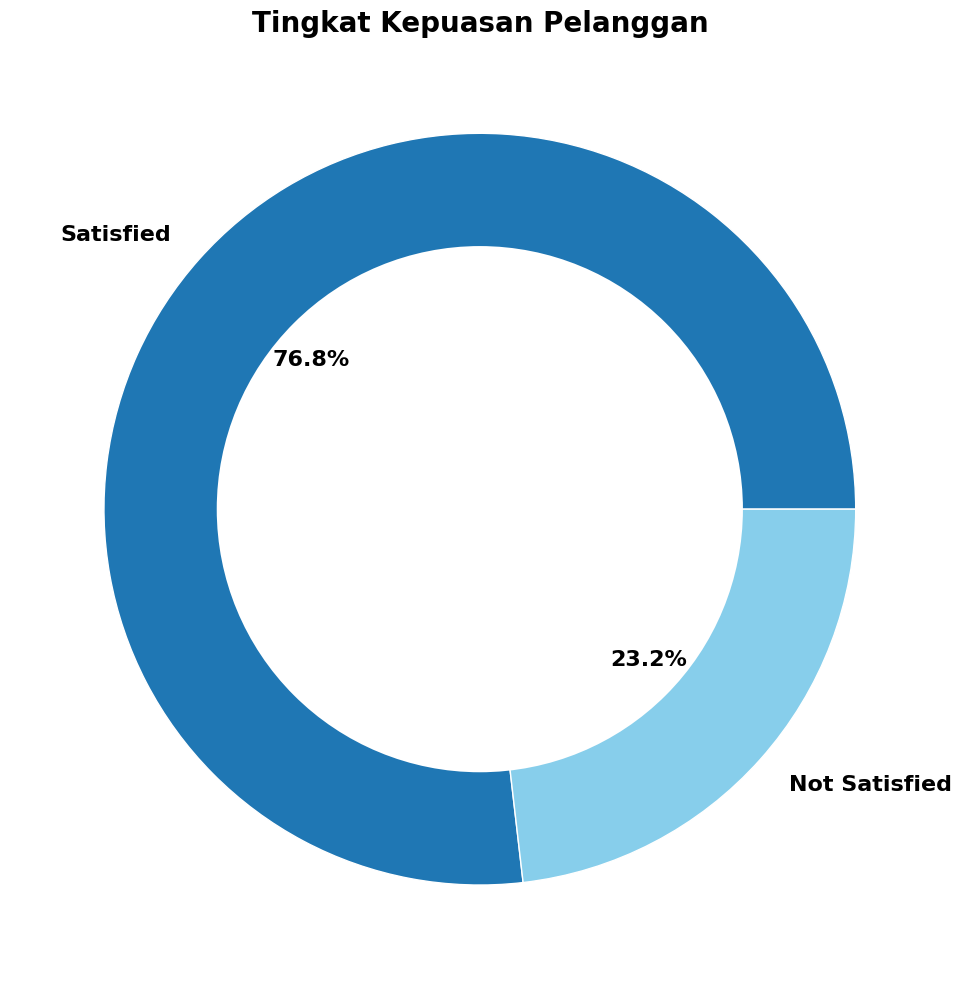

In [64]:
# Visualisasi Presentase Tingkat Kepuasan Pelanggan
plt.figure(figsize=(10, 10))  # canvas besar

# Chart donat
wedges, texts, autotexts = plt.pie(
    satisfaction_counts, 
    labels=satisfaction_counts.index, 
    autopct='%1.1f%%',   # tampilkan persentase
    colors=["#1f77b4", "#87ceeb"],  # biru lebih jelas
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 16, 'fontweight': 'bold'}
)

# Lubang tengah donat
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

# Styling persentase agar lebih terlihat
for autotext in autotexts:
    autotext.set_fontsize(16)       # font lebih besar
    autotext.set_fontweight('bold') # bold
    autotext.set_color("black")     # hitam biar kontras

# Judul chart
plt.title("Tingkat Kepuasan Pelanggan", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()



# Insight

- Mayoritas pelanggan puas (76.9%), namun 23.2% tidak puas — angka signifikan yang berpotensi memengaruhi keputusan pembelian. 

In [66]:
#STEP 8.2
# Filter review dengan judul dan pesan untuk menemukan informasi tentang rasio review per transaksi untuk setiap pelanggan
# Memilih pelanggan yang mengisi review_title dan review_comment_message
# Filter review yang memiliki judul & pesan
# 1. Filter hanya ulasan yang ada judul & pesan
reviews_with_text = df_merged[
    df_merged['review_comment_title'].notna() & df_merged['review_comment_message'].notna()
]

# 2. Hitung total ulasan per pelanggan
customer_review_count = reviews_with_text.groupby('customer_unique_id').size().reset_index(name='total_reviews')

# 3. Hitung total pesanan per pelanggan
customer_order_count = df_merged.groupby('customer_unique_id').size().reset_index(name='total_orders')

# 4. Gabungkan tabel ulasan & pesanan
customer_review_ratio = pd.merge(customer_order_count, customer_review_count, on='customer_unique_id', how='left')

# 5. Isi NaN (jika pelanggan tidak punya review dengan teks)
customer_review_ratio['total_reviews'] = customer_review_ratio['total_reviews'].fillna(0)

# 6. Hitung rasio ulasan per transaksi
customer_review_ratio['review_per_order_ratio'] = (
    customer_review_ratio['total_reviews'] / customer_review_ratio['total_orders']
)

# 7. Lihat hasil
customer_review_ratio.head()


,customer_unique_id,total_orders,total_reviews,review_per_order_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1,1.0
2,0000f46a3911fa3c0805444483337064,1,1,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,1,1.0


<Figure size 1200x700 with 0 Axes>

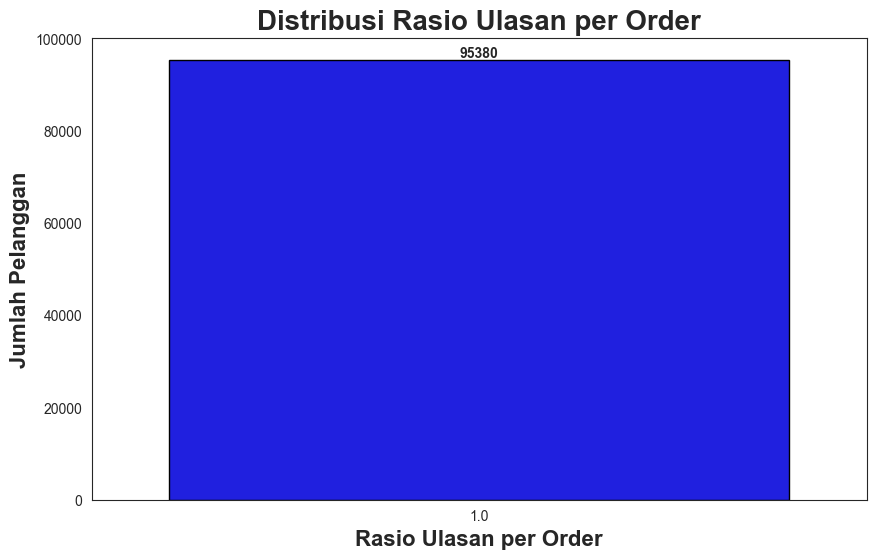

In [68]:
# Visualisasi Distribusi Rasio Ulasan per Transaksi per Pelanggan
import matplotlib.pyplot as plt
import seaborn as sns

# Set style tanpa grid
sns.set_style("white")

plt.figure(figsize=(12,7))  # canvas lebih besar

# Proporsi distribusi
counts = customer_review_ratio['review_per_order_ratio'].value_counts().sort_index()

plt.figure(figsize=(10,6))
sns.barplot(x=counts.index, y=counts.values, color="blue", edgecolor="black")

# Tambahkan angka
for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.title("Distribusi Rasio Ulasan per Order", fontsize=20, weight="bold")
plt.xlabel("Rasio Ulasan per Order", fontsize=16, weight="bold")
plt.ylabel("Jumlah Pelanggan", fontsize=16, weight="bold")
plt.show()



# Insight

- Selain itu, rasio ulasan ≈1.0 pada hampir semua pelanggan (±96 ribu) menunjukkan bahwa ulasan diberikan secara konsisten untuk setiap transaksi.

# STEP 9: Time Series Analysis

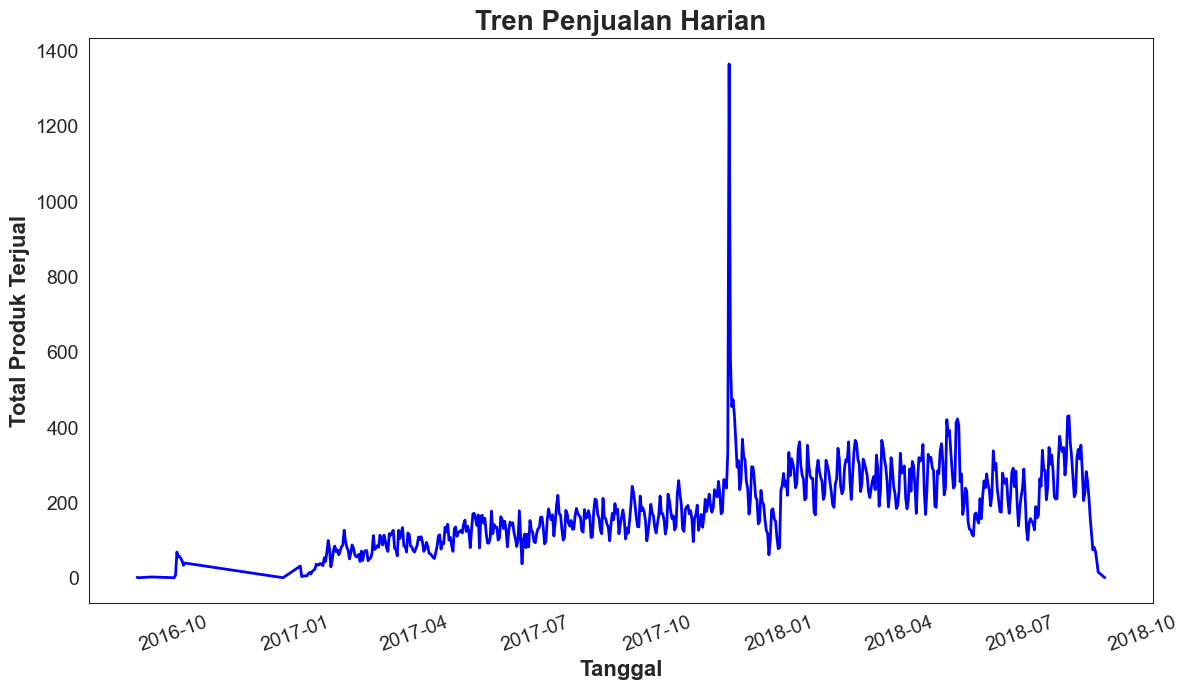

In [70]:
# 9.1 - Langkah untuk menghitung dan visualisasi tren penjualan harian 
# Asumsikan kamu sudah punya dataframe order_items dan orders yang sudah di merge sebelumnya 
# Gabungkan order_items dengan orders untuk dapatkan tanggal
df_orders_items = order_items.merge(orders, on='order_id')

# Ubah kolom tanggal ke datetime 
df_orders_items['order_purchase_timestamp'] = pd.to_datetime(df_orders_items['order_purchase_timestamp'])

#Ubah kolom tanggal harian (tanpa jam)
df_orders_items['order_date'] = df_orders_items['order_purchase_timestamp'].dt.date

# Hitung jumlah item yang terjual per hari 
daily_sales = df_orders_items.groupby('order_date')['order_item_id'].count().reset_index()
daily_sales.columns = ['order_date', 'total_items_sold']

# Visualisasi tren penjualan harian
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))  # perbesar canvas

plt.plot(
    daily_sales['order_date'],
    daily_sales['total_items_sold'],
    color='blue',
    linewidth=2
)

# Judul & label axis
plt.title('Tren Penjualan Harian', fontsize=20, fontweight='bold')
plt.xlabel('Tanggal', fontsize=16, fontweight='bold')
plt.ylabel('Total Produk Terjual', fontsize=16, fontweight='bold')

# Perbesar tick label
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=14)

# Hapus grid
plt.grid(False)

plt.tight_layout()
plt.show()



# Insight: 

- Tren penjualan harian menunjukkan adanya lonjakan ekstrem pada akhir 2017. Pola ini kuat mengindikasikan pengaruh holiday season (Natal & Black Friday) yang biasanya disertai promo besar-besaran dan diskon, sehingga mendorong peningkatan penjualan signifikan.
- Artinya, strategi seasonal campaign terbukti efektif dalam mendorong volume transaksi.

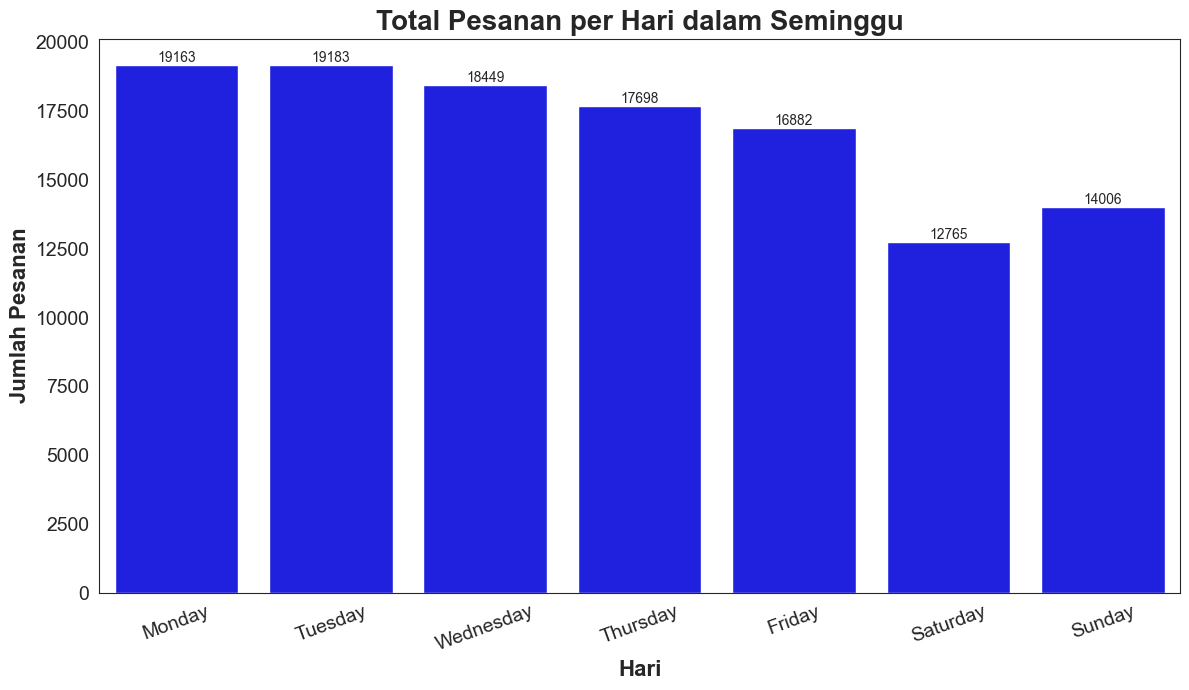

In [72]:
# STEP 9.2 (Seasonality analysis berdasarkan hari dalam minggu (senin sampai minggu)
# Menambahkan kolom hari dalam seminggu
df_merged["day_of_week"] = df_merged["order_purchase_timestamp"].dt.day_name()

# Menghitung total pesanan per hari dalam seminggu
weekly_orders = df_merged.groupby("day_of_week", as_index=False)["order_id"].count()

# Mengurutkan sesuai urutan hari
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_orders["day_of_week"] = pd.Categorical(weekly_orders["day_of_week"], categories=order_days, ordered=True)
weekly_orders = weekly_orders.sort_values("day_of_week")

# Visualisasi Total Pesanan per Hari dalam Seminggu
plt.figure(figsize=(12,7))  # canvas lebih besar
ax = sns.barplot(
    data=weekly_orders,
    x="day_of_week",
    y="order_id",
    color="blue"
)

# Judul & label axis
plt.title("Total Pesanan per Hari dalam Seminggu", fontsize=20, fontweight='bold')
plt.xlabel("Hari", fontsize=16, fontweight='bold')
plt.ylabel("Jumlah Pesanan", fontsize=16, fontweight='bold')

# Perbesar tick label
plt.xticks(rotation=20, fontsize=14)
plt.yticks(fontsize=14)

# Tampilkan angka di atas bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom',
                fontsize=10)

# Hapus grid
ax.grid(False)

plt.tight_layout()
plt.show()


# Insight:

- Hari Senin & Selasa memiliki potensi order produk terbanyak 
- Hari Sabtu & Minggu mengalami penurunan order produk.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\1058671361.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_merged, x='purchase_year', palette='Blues_r')


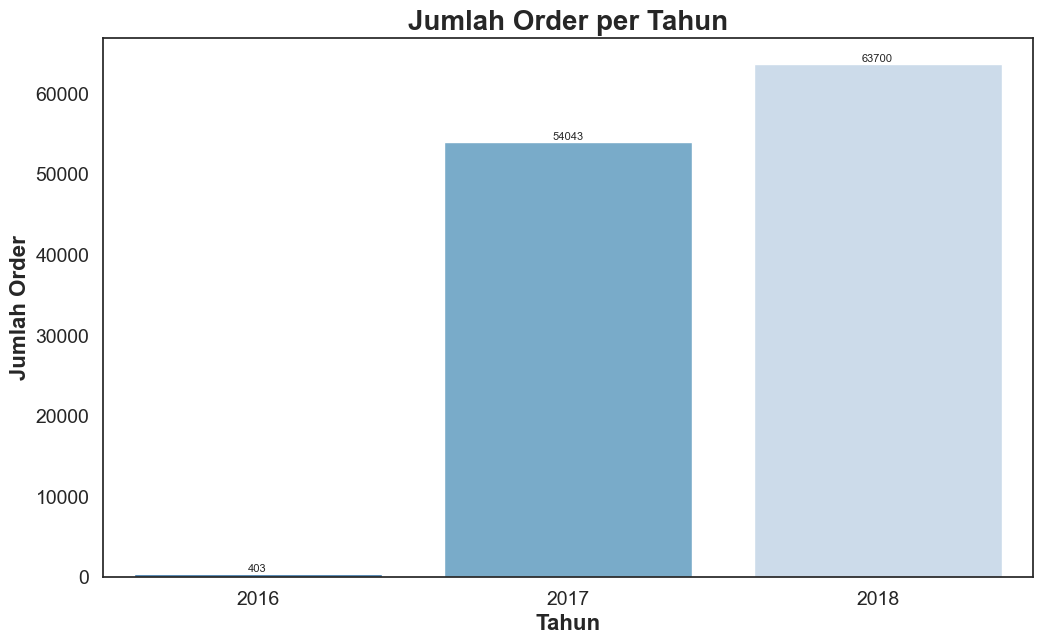

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\1058671361.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(data=df_merged, x='purchase_month_name', order=month_order, palette='Blues_r')


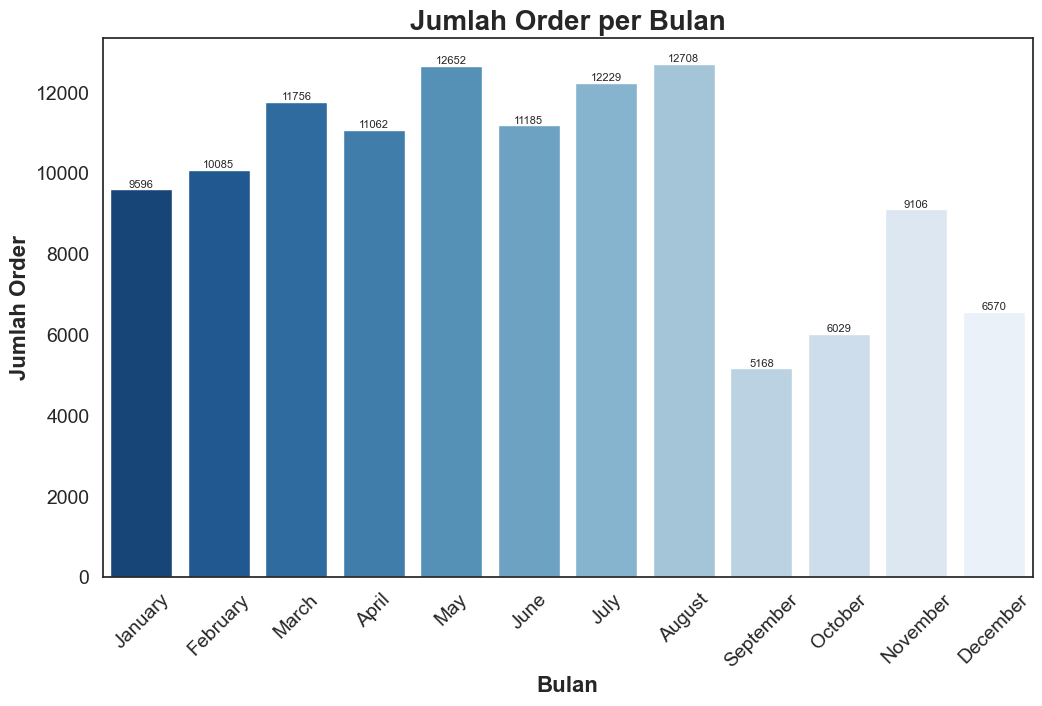

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\1058671361.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.countplot(data=df_merged, x='purchase_day_name', order=day_order, palette='Blues_r')


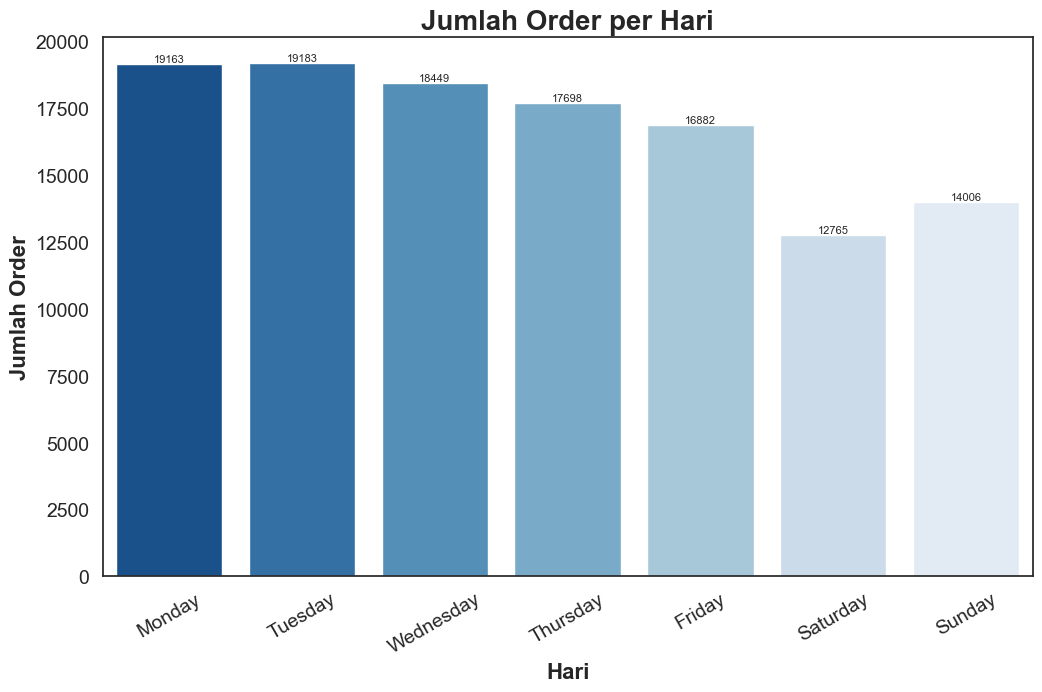

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\1058671361.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.countplot(data=df_merged, x='purchase_hour', palette='Blues_r')


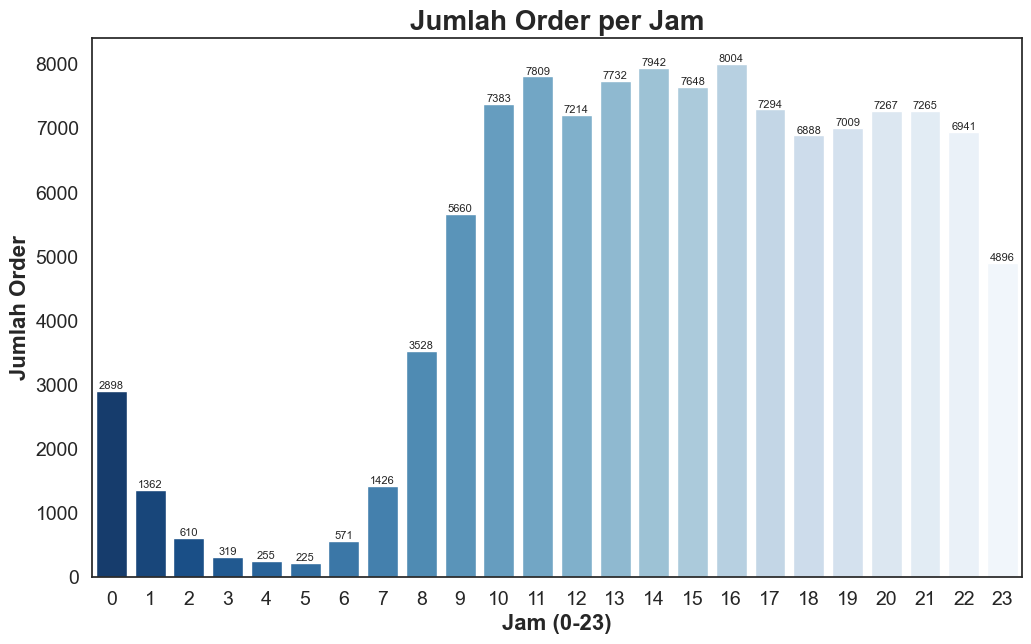

In [74]:
# Visualisasi Order per Time (Days, Months, Years, Hours)
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom waktu sudah dibuat
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'], errors='coerce')
df_merged['purchase_year'] = df_merged['order_purchase_timestamp'].dt.year
df_merged['purchase_month_name'] = df_merged['order_purchase_timestamp'].dt.strftime('%B')
df_merged['purchase_day_name'] = df_merged['order_purchase_timestamp'].dt.strftime('%A')
df_merged['purchase_hour'] = df_merged['order_purchase_timestamp'].dt.hour

# Urutan bulan dan hari untuk visualisasi
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Buat figure besar
sns.set(style='white')

# --- Chart 1: Jumlah Order per Tahun ---
plt.figure(figsize=(12,7))
ax1 = sns.countplot(data=df_merged, x='purchase_year', palette='Blues_r')
plt.title('Jumlah Order per Tahun', fontsize=20, fontweight='bold')
plt.xlabel('Tahun', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Order', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', fontsize=8)
plt.show()

# --- Chart 2: Jumlah Order per Bulan ---
plt.figure(figsize=(12,7))
ax2 = sns.countplot(data=df_merged, x='purchase_month_name', order=month_order, palette='Blues_r')
plt.title('Jumlah Order per Bulan', fontsize=20, fontweight='bold')
plt.xlabel('Bulan', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Order', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=8)
plt.show()

# --- Chart 3: Jumlah Order per Hari ---
plt.figure(figsize=(12,7))
ax3 = sns.countplot(data=df_merged, x='purchase_day_name', order=day_order, palette='Blues_r')
plt.title('Jumlah Order per Hari', fontsize=20, fontweight='bold')
plt.xlabel('Hari', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Order', fontsize=16, fontweight='bold')
plt.xticks(rotation=30, fontsize=14)
plt.yticks(fontsize=14)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%d', label_type='edge', fontsize=8)
plt.show()

# --- Chart 4: Jumlah Order per Jam ---
plt.figure(figsize=(12,7))
ax4 = sns.countplot(data=df_merged, x='purchase_hour', palette='Blues_r')
plt.title('Jumlah Order per Jam', fontsize=20, fontweight='bold')
plt.xlabel('Jam (0-23)', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Order', fontsize=16, fontweight='bold')
plt.xticks(range(0,24), fontsize=14)
plt.yticks(fontsize=14)
for container in ax4.containers:
    ax4.bar_label(container, fmt='%d', label_type='edge', fontsize=8)
plt.show()


# Insight:
a. Order per tahun
-  Bisnis menunjukkan pertumbuhan konsisten dan potensi ekspansi pasar ke depan karena semakin naik pertumbuhannya

b. Order Behaviour per Bulan:
- Januari – Juli: Order relatif stabil dan fluktuatif. Puncak order: Mei (12.652) & Agustus (12.708).
- Setelah Agustus, order turun drastis hingga 50%, dengan titik terendah di September (5.168).
- Ada musiman (seasonality effect) → bulan Mei dipengaruhi Hari Ibu, bulan Agustus dipengaruhi oleh hari Ayah, & akhir tahun terjadi pelemahan permintaan.

c. Order Behaviour per Hari
- Order tertinggi terjadi di weekdays:
- Senin (19.163) & Selasa (19.183) → puncak order.
- Menurun bertahap hingga Jumat (16.882).
- Order terendah di weekend: Sabtu (12.765) & Minggu (14.006).
- Pola order konsumen lebih aktif di awal minggu → strategi promo bisa difokuskan di Senin–Rabu.

Top 10 Kategori Produk di Bulan Agustus:
product_category_name_english
bed_bath_table           1254
health_beauty            1244
housewares                962
furniture_decor           919
sports_leisure            919
computers_accessories     802
watches_gifts             645
auto                      539
telephony                 427
cool_stuff                402
Name: count, dtype: int64


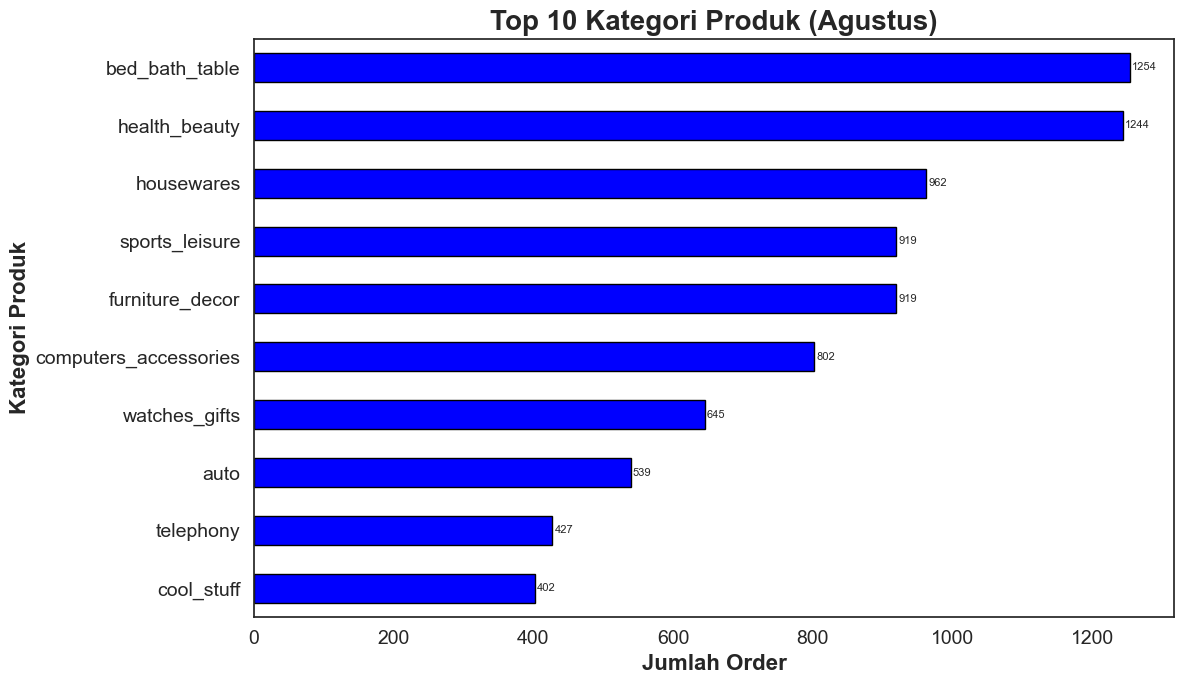

In [226]:
# Mencari Analisis Kategori Produk Order Tertinggi Bulan Agustus
# Filter order bulan Agustus
aug_data = df_merged[df_merged['order_purchase_timestamp'].dt.month == 8]

# Hitung jumlah order per kategori produk
top10_aug = (
    aug_data['product_category_name_english']
    .value_counts()
    .head(10)
)

# Tampilkan hasil
print("Top 10 Kategori Produk di Bulan Agustus:")
print(top10_aug)

# Visualisasi
# Visualisasi Top 10 Kategori Produk - Bulan Agustus
plt.figure(figsize=(12,7))
ax = top10_aug.sort_values().plot(
    kind="barh", 
    color="blue", 
    edgecolor="black"
)

# Judul & Label
plt.title("Top 10 Kategori Produk (Agustus)", fontsize=20, fontweight="bold")
plt.xlabel("Jumlah Order", fontsize=16, fontweight="bold")
plt.ylabel("Kategori Produk", fontsize=16, fontweight="bold")

# Hilangkan grid
plt.grid(False)

# Perbesar tick label
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tambahkan angka di ujung bar
for p in ax.patches:
    plt.text(
        p.get_width() + 3,              # posisi x sedikit di kanan bar
        p.get_y() + p.get_height()/2,   # posisi y di tengah bar
        int(p.get_width()),             # nilai order
        va='center', fontsize=8
    )

plt.tight_layout()
plt.show()



# Insight

- Produk terlaris: Bed_Bath_Table, Health_Beauty, Housewares, Furniture_Decor, Sports_Leisure 
- Produk kategori hadiah & kebutuhan rumah tangga mendominasi → sesuai dengan momen Hari Ibu.
- Persipkan stok product hari Ibu fokus ke Garden_Tools, Furniture_Decor.
- Perusahaan harus mempersiapkan stok produk hadiah, kecantikan, dan dekorasi menjelang Mei agar dapat memaksimalkan revenue seasonal.

Top 10 Kategori Produk di Bulan Mei:
product_category_name_english
bed_bath_table           1191
health_beauty            1101
housewares                961
furniture_decor           936
sports_leisure            830
computers_accessories     829
watches_gifts             788
telephony                 486
auto                      458
garden_tools              450
Name: count, dtype: int64


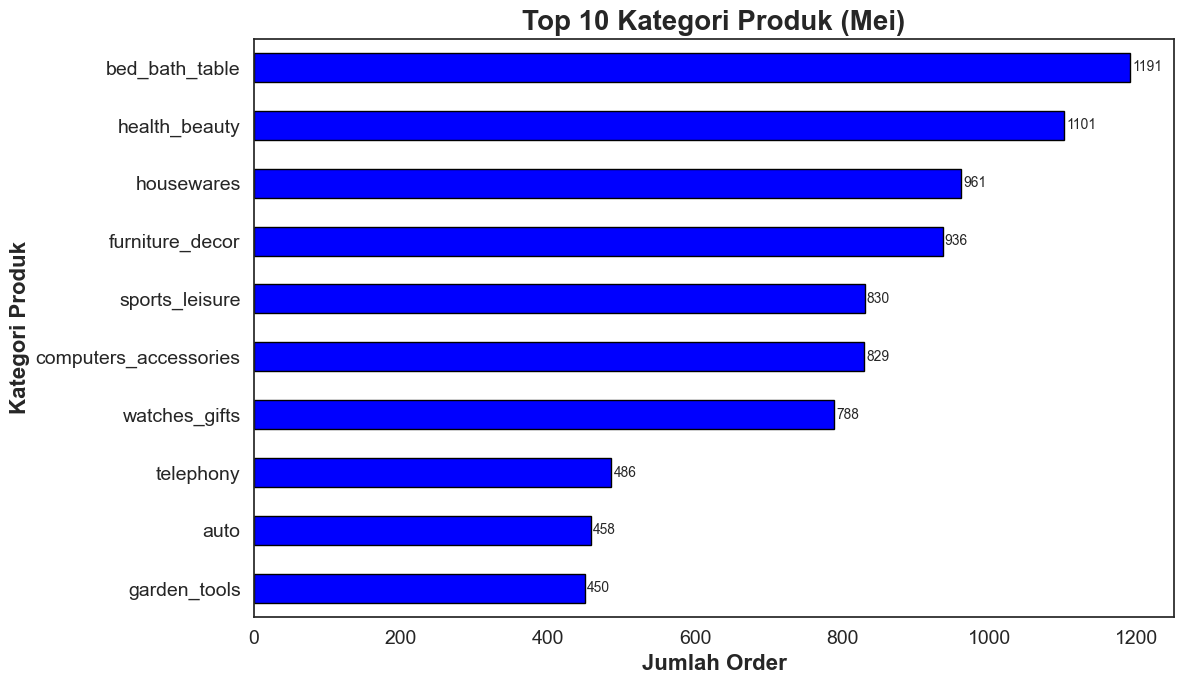

In [76]:
# Mencari Analisis Kategori Produk Order Tertinggi Bulan Mei 
may_data = df_merged[df_merged['order_purchase_timestamp'].dt.month == 5]

# Hitung jumlah order per kategori produk
top10_may = (
    may_data['product_category_name_english']
    .value_counts()
    .head(10)
)

# Tampilkan hasil
print("Top 10 Kategori Produk di Bulan Mei:")
print(top10_may)

# Visualisasi Top 10 Kategori Produk - Bulan Mei
plt.figure(figsize=(12,7))
ax = top10_may.sort_values().plot(
    kind="barh", 
    color="blue", 
    edgecolor="black"
)

# Judul & Label
plt.title("Top 10 Kategori Produk (Mei)", fontsize=20, fontweight="bold")
plt.xlabel("Jumlah Order", fontsize=16, fontweight="bold")
plt.ylabel("Kategori Produk", fontsize=16, fontweight="bold")

# Hilangkan grid
plt.grid(False)

# Perbesar tick label
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tambahkan angka di ujung bar
for p in ax.patches:
    plt.text(
        p.get_width() + 3,              # posisi x sedikit di kanan bar
        p.get_y() + p.get_height()/2,   # posisi y di tengah bar
        int(p.get_width()),             # nilai order
        va='center', fontsize=10
    )

plt.tight_layout()
plt.show()



# Inisght:
- Produk terlaris: Bed_Bath_Table, Health_Beauty, Housewares, Furniture_Decor, Sports_Leisure 
- Produk kategori hadiah & kebutuhan rumah tangga mendominasi → sesuai dengan momen Hari Ibu.
- Persipkan stok product hari Ibu fokus ke Garden_Tools, Furniture_Decor.
- Perusahaan harus mempersiapkan stok produk hadiah, kecantikan, dan dekorasi menjelang Mei agar dapat memaksimalkan revenue seasonal.

# Exploratory Data

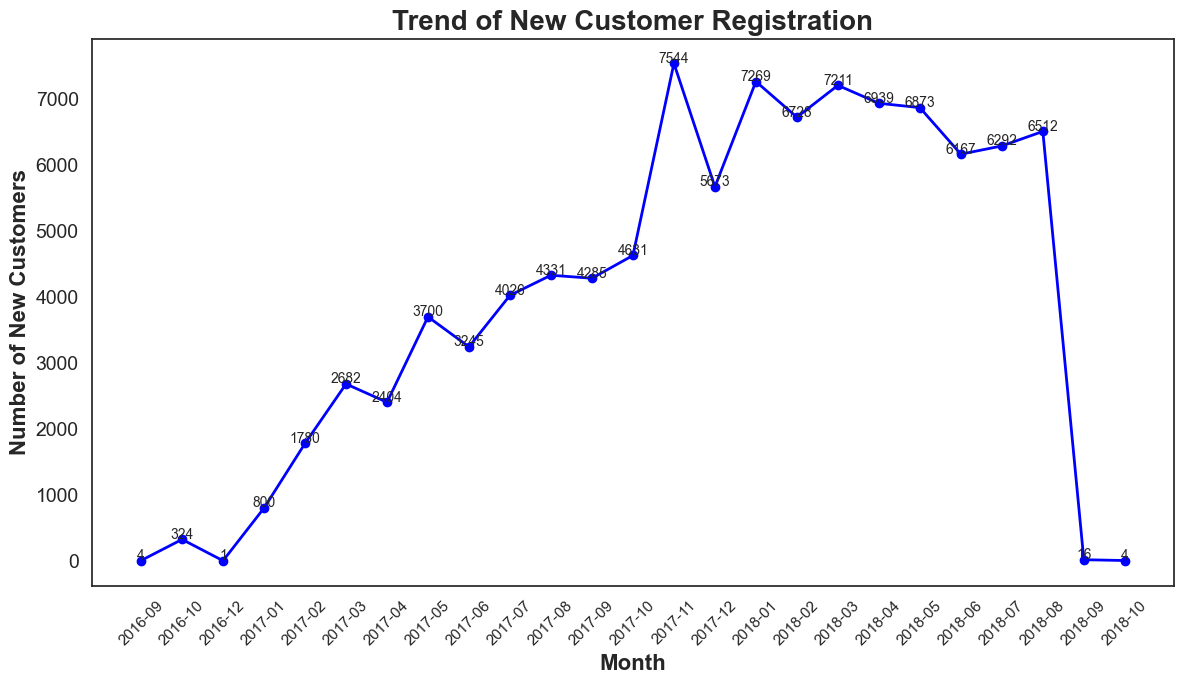

In [78]:
# Exploratory Data
# trend of new customer registration
# Ambil first order date setiap customer
customer_first_order = orders.groupby("customer_id")["order_purchase_timestamp"].min().reset_index()
customer_first_order.columns = ["customer_id", "first_order_date"]

# Konversi ke datetime
customer_first_order["first_order_date"] = pd.to_datetime(customer_first_order["first_order_date"])

# Buat kolom year-month
customer_first_order["year_month"] = customer_first_order["first_order_date"].dt.to_period("M")

# Hitung jumlah customer baru per bulan
new_customer_trend = customer_first_order.groupby("year_month")["customer_id"].count().reset_index()
new_customer_trend.rename(columns={"customer_id": "num_new_customers"}, inplace=True)

# Visualisasi Trend of New Customer Registration
plt.figure(figsize=(12,7))
ax = plt.plot(
    new_customer_trend["year_month"].astype(str),
    new_customer_trend["num_new_customers"],
    marker="o", color="blue", linewidth=2
)

# Tambahkan angka di atas tiap titik
for x, y in zip(new_customer_trend["year_month"].astype(str), new_customer_trend["num_new_customers"]):
    plt.text(x, y+10, str(y), ha="center", fontsize=10)

# Styling
plt.xticks(rotation=45)
plt.yticks(fontsize=14)
plt.title("Trend of New Customer Registration", fontsize=20, fontweight="bold")
plt.xlabel("Month", fontsize=16, fontweight="bold")
plt.ylabel("Number of New Customers", fontsize=16, fontweight="bold")

# Hapus grid
plt.grid(False)

plt.tight_layout()
plt.show()


Top kategori produk berdasarkan jumlah transaksi:
   product_category_name_english  total_transactions
7                 bed_bath_table               11847
43                 health_beauty                9947
65                sports_leisure                8942
39               furniture_decor                8743
15         computers_accessories                8105
49                    housewares                7331
71                 watches_gifts                6161
68                     telephony                4692
42                  garden_tools                4558
5                           auto                4356

Top kategori produk berdasarkan total revenue:
   product_category_name_english  total_revenue
43                 health_beauty     1479005.08
71                 watches_gifts     1349426.23
7                 bed_bath_table     1313577.37
65                sports_leisure     1196819.88
15         computers_accessories     1098475.97
39               furniture_deco

<Figure size 1200x700 with 0 Axes>

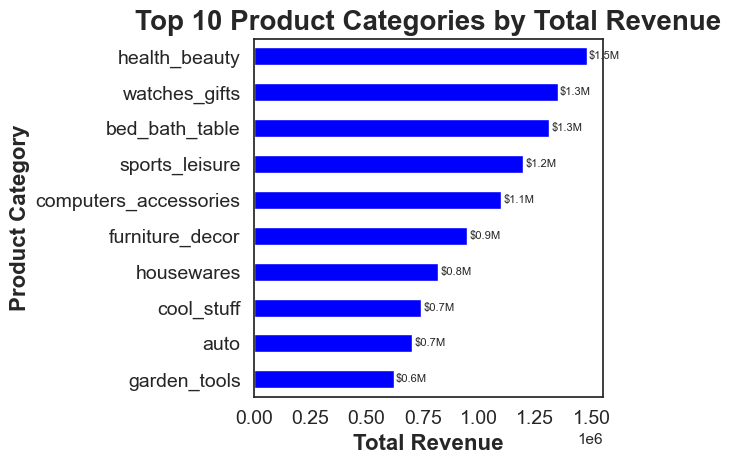

<Figure size 1200x700 with 0 Axes>

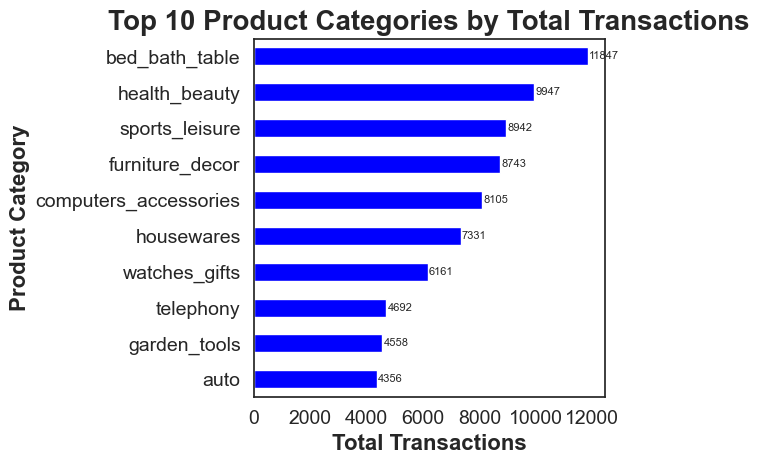

In [80]:
# Mencari top 5 penjualan produk tertinggi
# Hitung total sales per produk

# 1. Total transaksi per kategori (jumlah item terjual)
category_sales_count = df_merged.groupby('product_category_name_english')['order_id'].count().reset_index()
category_sales_count.rename(columns={'order_id': 'total_transactions'}, inplace=True)

# Urutkan dari yang tertinggi
top_categories_by_count = category_sales_count.sort_values(by='total_transactions', ascending=False)
print("Top kategori produk berdasarkan jumlah transaksi:")
print(top_categories_by_count.head(10))

# 2. Total revenue per kategori
category_revenue = df_merged.groupby('product_category_name_english')['revenue'].sum().reset_index()
category_revenue.rename(columns={'revenue': 'total_revenue'}, inplace=True)

# Urutkan dari yang tertinggi
top_categories_by_revenue = category_revenue.sort_values(by='total_revenue', ascending=False)
print("\nTop kategori produk berdasarkan total revenue:")
print(top_categories_by_revenue.head(10))

# 3. Visualisasi (opsional)
import matplotlib.pyplot as plt
import numpy as np


# --- Chart 1: Top 10 Kategori berdasarkan Total Revenue ---
plt.figure(figsize=(12,7))
top_categories_by_revenue.head(10).sort_values(by="total_revenue").plot(
    kind="barh", x="product_category_name_english", y="total_revenue",
    color="blue", legend=False
)

# Tambahkan angka di ujung bar
for i, val in enumerate(top_categories_by_revenue.head(10).sort_values(by="total_revenue")["total_revenue"]):
    plt.text(val+10000, i, f"${val/1_000_000:.1f}M", va="center", fontsize=8)

plt.title("Top 10 Product Categories by Total Revenue", fontsize=20, fontweight="bold")
plt.xlabel("Total Revenue", fontsize=16, fontweight="bold")
plt.ylabel("Product Category", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


# --- Chart 2: Top 10 Kategori berdasarkan Total Transactions ---
plt.figure(figsize=(12,7))
top_categories_by_count.head(10).sort_values(by="total_transactions").plot(
    kind="barh", x="product_category_name_english", y="total_transactions",
    color="blue", legend=False
)

# Tambahkan angka di ujung bar
for i, val in enumerate(top_categories_by_count.head(10).sort_values(by="total_transactions")["total_transactions"]):
    plt.text(val+50, i, str(val), va="center", fontsize=8)

plt.title("Top 10 Product Categories by Total Transactions", fontsize=20, fontweight="bold")
plt.xlabel("Total Transactions", fontsize=16, fontweight="bold")
plt.ylabel("Product Category", fontsize=16, fontweight="bold")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()




In [82]:
# Mencari produk dengan penjualan not satisfied tertinggi

# Pastikan kolom review_score numeric
order_reviews["review_score"] = pd.to_numeric(order_reviews["review_score"], errors="coerce")

# Filter review tidak puas (skor 1-3)
not_satisfied = order_reviews[order_reviews["review_score"] <= 3]

# Gabungkan dengan order_items dan products
not_satisfied_products = not_satisfied \
    .merge(order_items, on="order_id", how="left") \
    .merge(products, on="product_id", how="left")

# Hitung revenue & jumlah review tidak puas per kategori
not_satisfied_category = not_satisfied_products.groupby(
    "product_category_name_english"
).agg(
    total_revenue=("price", "sum"),
    total_not_satisfied=("review_id", "count")
).reset_index()

# Urutkan berdasarkan revenue tertinggi
top5_not_satisfied_category = not_satisfied_category.sort_values(
    "total_revenue", ascending=False
).head(5)

top5_not_satisfied_category


,product_category_name_english,total_revenue,total_not_satisfied
7,bed_bath_table,99.9099.90119.0099.90159.9059.0085.0059.00149....,3221
49,housewares,99.8072.00150.00150.00150.00150.00150.00150.00...,1680
47,home_confort,89.90269.0089.9049.9086.9049.90230.0086.9086.9...,144
53,luggage_accessories,89.90129.9063.90158.2645.6077.0048.9054.9040.9...,177
62,signaling_and_security,87.0087.0064.3964.3984.9984.9925.0069.9943.501...,52


Rata-rata delay berdasarkan kepuasan:
satisfaction
Not Satisfied    -6.565175
Satisfied       -13.063986
Name: delivery_delay, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10620\1814002522.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


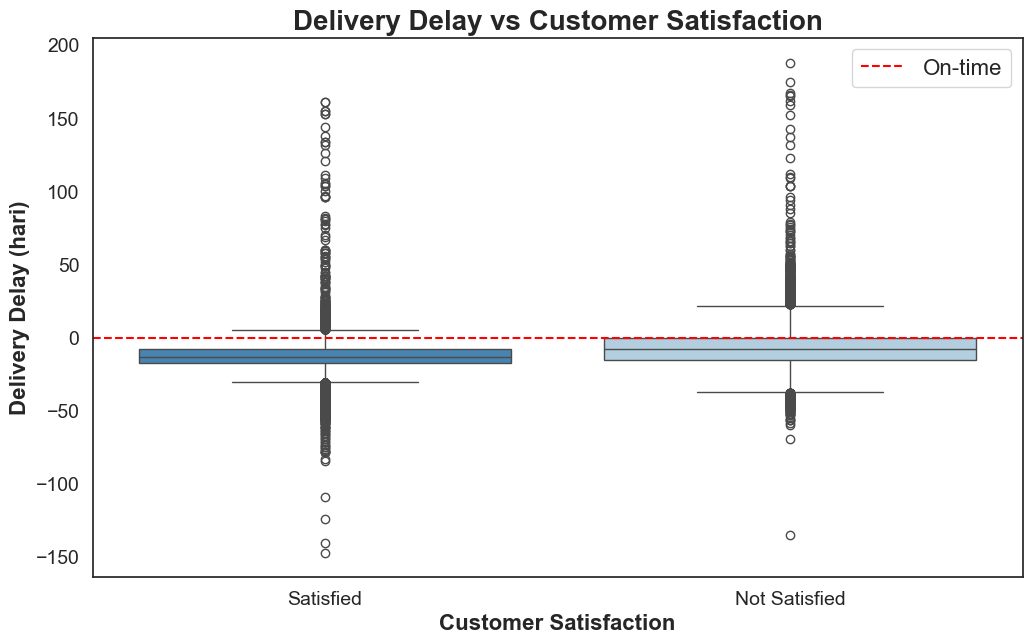

In [84]:
# Exploratory Data
# Korelasi Review dengan Pengiriman (Delivery Performance)
# --- 1. Pastikan review_score numerik ---
order_reviews['review_score'] = pd.to_numeric(order_reviews['review_score'], errors='coerce')

# Label satisfaction
order_reviews['satisfaction'] = order_reviews['review_score'].apply(
    lambda x: 'Satisfied' if x >= 4 else 'Not Satisfied'
)

# --- 2. Ambil data pengiriman dari orders ---
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# --- 3. Hitung delay pengiriman ---
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['delivery_delay'] = orders['delivery_delay'].fillna(0)  # handle NaN

# --- 4. Gabungkan dengan review ---
df_review_orders = order_reviews.merge(
    orders[['order_id', 'delivery_delay']],
    on='order_id',
    how='left'
)

# --- 5. Analisis distribusi ---
delay_summary = df_review_orders.groupby('satisfaction')['delivery_delay'].mean()

print("Rata-rata delay berdasarkan kepuasan:")
print(delay_summary)

# --- 6. Visualisasi ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))  # lebih besar
sns.boxplot(
    x='satisfaction', 
    y='delivery_delay', 
    data=df_review_orders,
    width=0.8,  # kotak lebih ramping
    palette="Blues_r"
)

plt.axhline(0, color='red', linestyle='--', label="On-time")

plt.title("Delivery Delay vs Customer Satisfaction", fontsize=20, fontweight='bold')
plt.ylabel("Delivery Delay (hari)", fontsize=16, fontweight='bold')
plt.xlabel("Customer Satisfaction", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

plt.grid(False)  # hapus grid
plt.show()



# Insight: 
a. Pelanggan yang tidak puas (Not Satisfied) rata-rata mengalami keterlambatan lebih besar.
- Boxplot untuk Not Satisfied bergeser ke atas dari garis “On-time”. Artinya keterlambatan pengiriman punya pengaruh kuat pada ketidakpuasan.

b. Pelanggan yang puas (Satisfied) cenderung menerima barang tepat waktu atau lebih cepat.
- Median delay lebih dekat ke garis merah (0). Banyak titik di bawah 0 → artinya ada banyak pelanggan menerima barang lebih cepat dari estimasi.

c. Outlier ekstrem keterlambatan (>100 hari) banyak muncul di kelompok Not Satisfied. 
- Ini indikasi ada kasus logistik parah yang bikin pelanggan sangat kecewa.

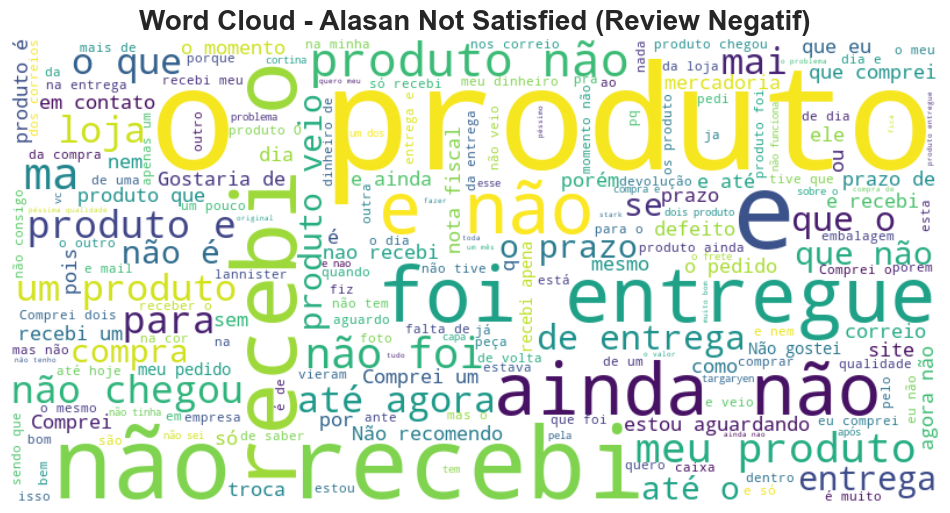

In [86]:
# Analisis Review Negative
from wordcloud import WordCloud, STOPWORDS

# Ambil review dengan skor rendah
negative_reviews = order_reviews[order_reviews['review_score'] <= 3]['review_comment_message'].dropna()

# Gabungkan semua review jadi 1 teks panjang
text = " ".join(negative_reviews)

# Buat word cloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Alasan Not Satisfied (Review Negatif)", fontsize=20, fontweight='bold')
plt.show()



# Penjelasan
a. Produk tidak sampai / tidak diterima
Banyak review menyinggung “não recebi” dan “não foi entregue” → pelanggan kecewa karena barang tidak sampai.

b. Keterlambatan pengiriman
Kata “prazo” (batas waktu) muncul cukup sering → artinya ada keluhan terkait pengiriman yang molor.

c. Produk rusak atau cacat
Kata “defeito” (defect/rusak) muncul → artinya kualitas produk juga jadi masalah.

d. Kurangnya kelengkapan administrasi
Ada kata “nota fiscal” → pelanggan mungkin komplain karena tidak mendapat struk / dokumen resmi.

e. Pengalaman belanja yang buruk dengan toko/penjual
Kata “loja” (toko) sering disebut, kemungkinan besar pelanggan kecewa dengan seller (pelayanan, komunikasi, atau kecepatan respon).

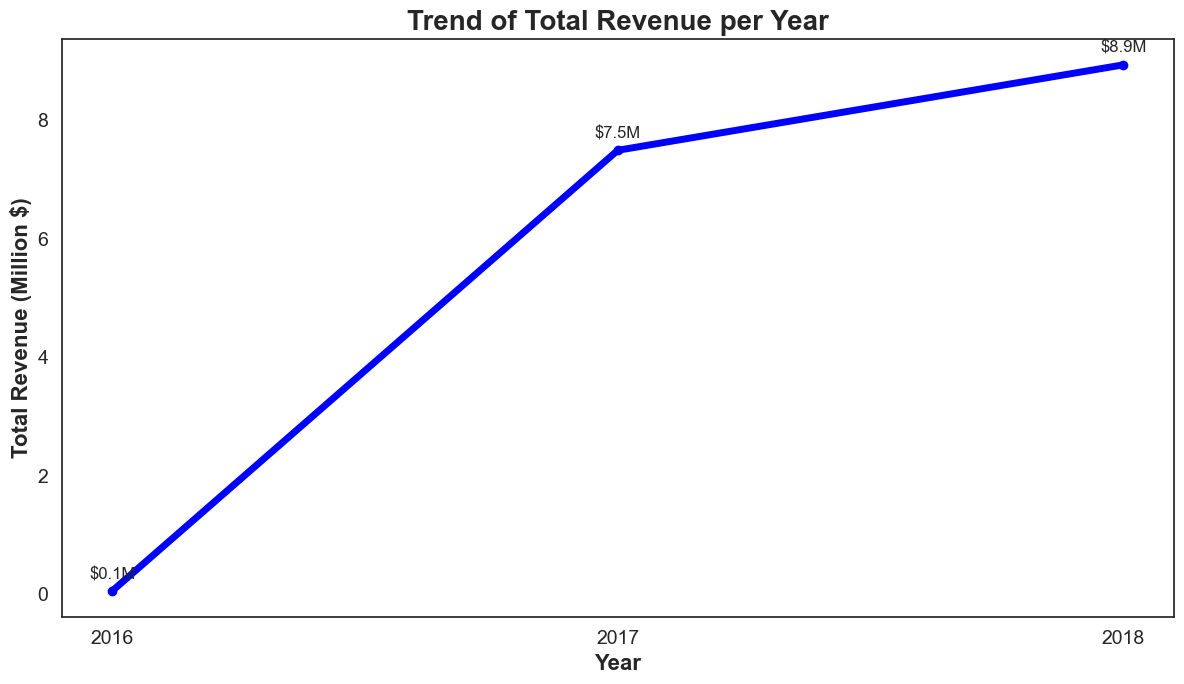

In [88]:
# Mencari total revenue tiap tahun 
import matplotlib.pyplot as plt

# Hitung total revenue per tahun
annual_revenue = df_merged.groupby('purchase_year')['revenue'].sum().reset_index()

# Visualisasi dengan line chart
plt.figure(figsize=(12,7))
plt.plot(
    annual_revenue['purchase_year'], 
    annual_revenue['revenue']/1_000_000, 
    marker='o', color='blue', linewidth=5
)

# Tambahkan angka di atas tiap titik
for x, y in zip(annual_revenue['purchase_year'], annual_revenue['revenue']/1_000_000):
    plt.text(x, y + 0.2, f"${y:,.1f}M", ha='center', fontsize=12)

plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Total Revenue (Million $)', fontsize=16, fontweight='bold')
plt.title('Trend of Total Revenue per Year', fontsize=20, fontweight='bold')
plt.xticks(annual_revenue['purchase_year'], fontsize=14)
plt.yticks(fontsize=14)

plt.grid(False)  # hapus grid
plt.tight_layout()
plt.show()



In [90]:
# Mencari produk penjualan favorit tiap tahun 
# Pastikan kolom purchase_year sudah ada
# df_merged['purchase_year'] = df_merged['order_purchase_timestamp'].dt.year

# Hitung jumlah transaksi per kategori per tahun
category_yearly_sales = df_merged.groupby(['purchase_year', 'product_category_name_english'])['order_id'].count().reset_index()
category_yearly_sales.rename(columns={'order_id': 'total_transactions'}, inplace=True)

# Cari kategori dengan transaksi terbanyak tiap tahun
favorite_category_per_year = category_yearly_sales.loc[category_yearly_sales.groupby('purchase_year')['total_transactions'].idxmax()]

# Tampilkan hasil
print("Kategori Produk Favorit Tiap Tahun (Berdasarkan Jumlah Transaksi):")
print(favorite_category_per_year)

# Hitung total revenue per kategori per tahun
category_yearly_revenue = df_merged.groupby(['purchase_year', 'product_category_name_english'])['revenue'].sum().reset_index()

# Cari kategori dengan revenue tertinggi tiap tahun
favorite_category_per_year_revenue = category_yearly_revenue.loc[category_yearly_revenue.groupby('purchase_year')['revenue'].idxmax()]

# Tampilkan hasil
print("\nKategori Produk Favorit Tiap Tahun (Berdasarkan Total Revenue):")
print(favorite_category_per_year_revenue)


Kategori Produk Favorit Tiap Tahun (Berdasarkan Jumlah Transaksi):
     purchase_year product_category_name_english  total_transactions
18            2016               furniture_decor                  80
39            2017                bed_bath_table                5704
111           2018                bed_bath_table                6135

Kategori Produk Favorit Tiap Tahun (Berdasarkan Total Revenue):
     purchase_year product_category_name_english    revenue
18            2016               furniture_decor    8073.05
39            2017                bed_bath_table  636392.78
147           2018                 health_beauty  899369.36


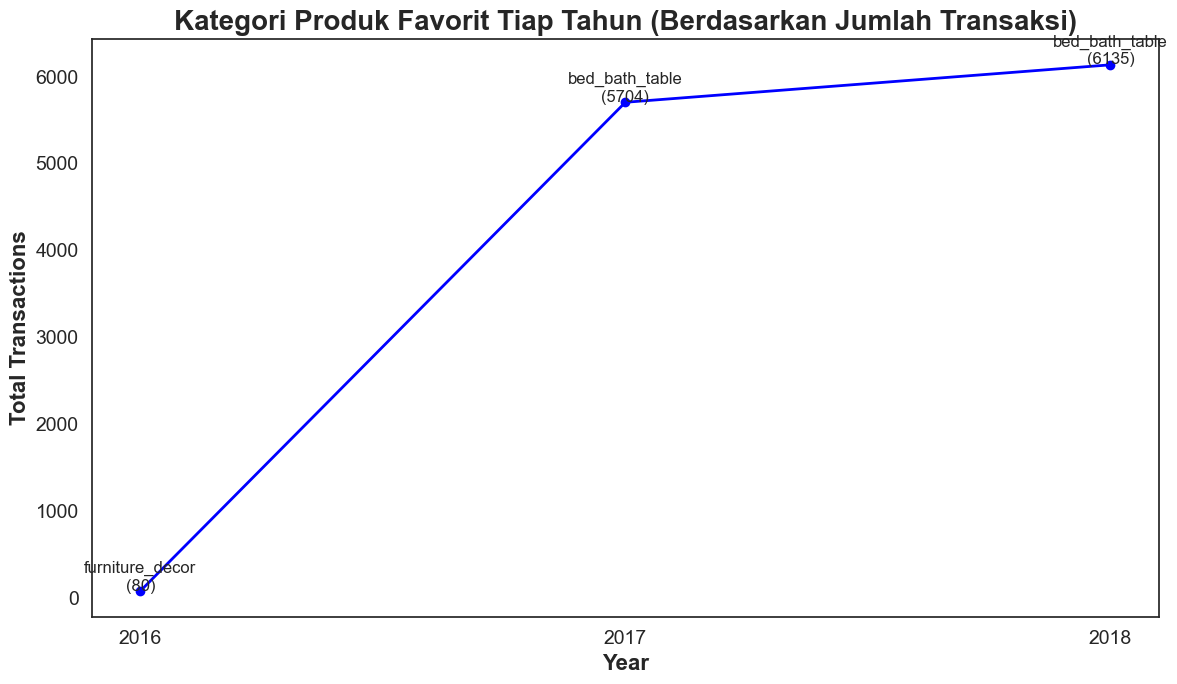

In [92]:
# Visualisasi produk penjualan favorit tiap tahun 
import matplotlib.pyplot as plt

# Gunakan data favorite_category_per_year (kategori favorit berdasarkan jumlah transaksi)
favorite_data = favorite_category_per_year.sort_values('purchase_year')

plt.figure(figsize=(12,7))
plt.plot(
    favorite_data['purchase_year'], 
    favorite_data['total_transactions'], 
    marker='o', linewidth=2, color='blue'
)

# Tambahkan nama kategori dan jumlah transaksi di atas titik
for x, y, label in zip(
    favorite_data['purchase_year'], 
    favorite_data['total_transactions'], 
    favorite_data['product_category_name_english']
):
    plt.text(x, y + 5, f"{label}\n({y})", ha='center', fontsize=12)

plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Total Transactions', fontsize=16, fontweight='bold')
plt.title('Kategori Produk Favorit Tiap Tahun (Berdasarkan Jumlah Transaksi)', fontsize=20, fontweight='bold')
plt.xticks(favorite_data['purchase_year'], fontsize=14)
plt.yticks(fontsize=14)

plt.grid(False)  # hapus grid
plt.tight_layout()
plt.show()



Top 10 Seller City berdasarkan jumlah transaksi:
               seller_city  total_transactions
517              sao paulo               29048
227               ibitinga                8271
159               curitiba                3147
483            santo andre                3134
507  sao jose do rio preto                2673
64          belo horizonte                2663
450         rio de janeiro                2519
220              guarulhos                2441
442         ribeirao preto                2357
325                maringa                2281


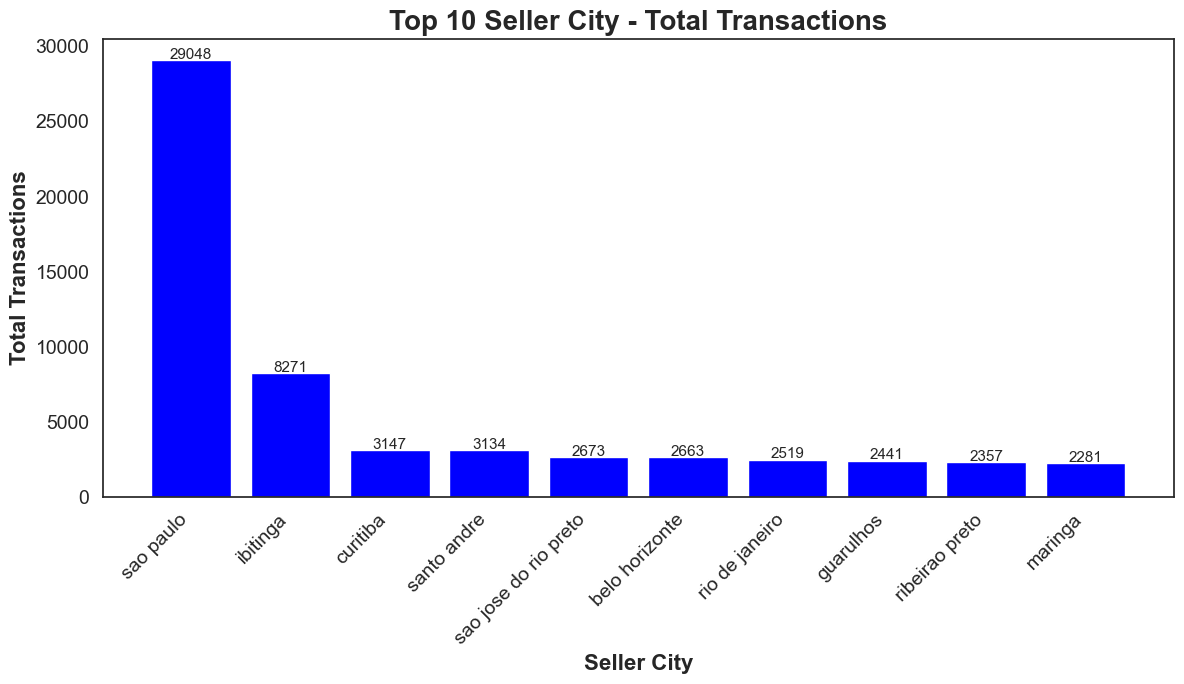

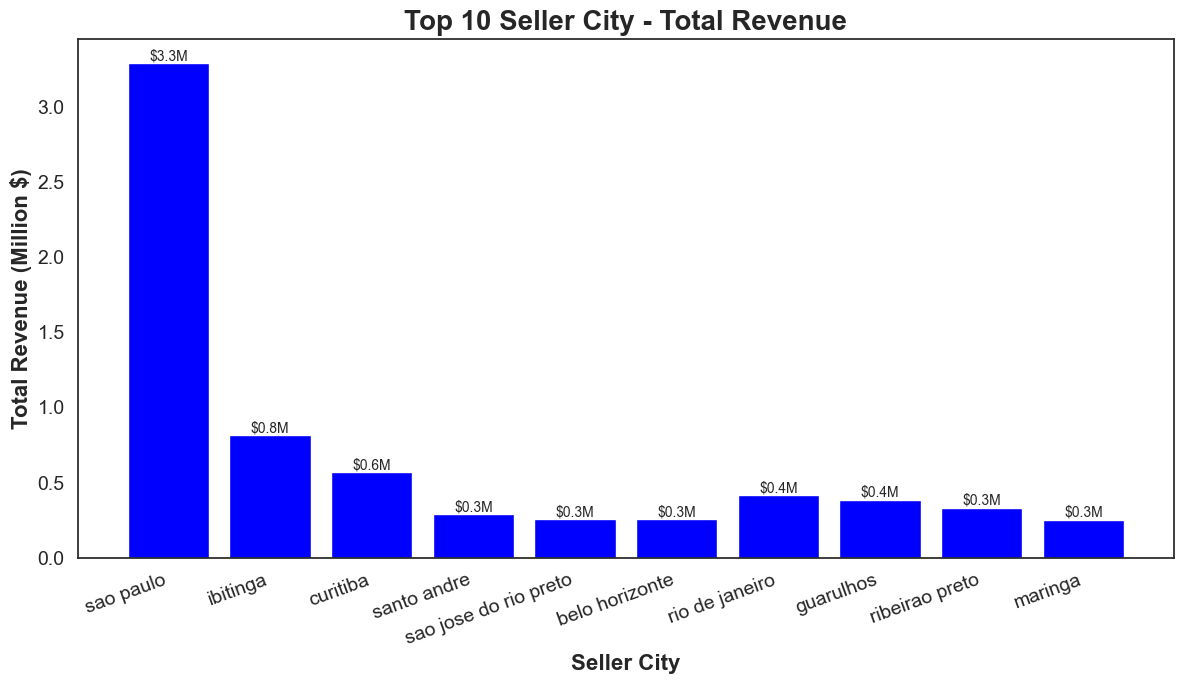

In [94]:
# Mencari seller city tertinggi

# Hitung total transaksi per kota seller
seller_city_transactions = df_merged.groupby('seller_city')['order_id'].count().reset_index()
seller_city_transactions.rename(columns={'order_id':'total_transactions'}, inplace=True)

# Urutkan dari yang tertinggi
top_seller_cities = seller_city_transactions.sort_values(by='total_transactions', ascending=False).head(10)
print("Top 10 Seller City berdasarkan jumlah transaksi:")
print(top_seller_cities)

# Hitung total revenue per kota seller
seller_city_revenue = df_merged.groupby('seller_city')['revenue'].sum().reset_index()
seller_city_revenue.rename(columns={'revenue':'total_revenue'}, inplace=True)

# Gabungkan transactions & revenue untuk visualisasi
top_seller_cities = top_seller_cities.merge(seller_city_revenue, on='seller_city')

# Visualisasi side-by-side (transactions & revenue)
import matplotlib.pyplot as plt

# --- Chart 1: Total Transactions ---
plt.figure(figsize=(12,7))
plt.bar(top_seller_cities['seller_city'], top_seller_cities['total_transactions'], color='blue')

# Tambahkan angka di atas bar
for i, val in enumerate(top_seller_cities['total_transactions']):
    plt.text(i, val + 100, f"{val}", ha='center', fontsize=11)

plt.title("Top 10 Seller City - Total Transactions", fontsize=20, fontweight='bold')
plt.xlabel("Seller City", fontsize=16,  fontweight='bold')
plt.ylabel("Total Transactions", fontsize=16,  fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()


# --- Chart 2: Total Revenue ---
plt.figure(figsize=(12,7))
plt.bar(top_seller_cities['seller_city'], top_seller_cities['total_revenue']/1_000_000, color='blue')

# Tambahkan angka di atas bar
for i, val in enumerate(top_seller_cities['total_revenue']/1_000_000):
    plt.text(i, val + 0.02, f"${val:,.1f}M", ha='center', fontsize=10)

plt.title("Top 10 Seller City - Total Revenue", fontsize=20, fontweight='bold')
plt.xlabel("Seller City", fontsize=16,  fontweight='bold')
plt.ylabel("Total Revenue (Million $)", fontsize=16,  fontweight='bold')
plt.xticks(rotation=20, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()



   product_category_name_english  total_transactions  total_revenue
37               furniture_decor                3019      329121.35
64                     telephony                3006      144809.75
18                    cool_stuff                2055      332748.45
47                    housewares                2046      200969.44
61                sports_leisure                1950      240777.64
41                 health_beauty                1855      291338.83
67                 watches_gifts                1782      164745.13
24                   electronics                1456       71840.70
13         computers_accessories                1365      180529.08
7                 bed_bath_table                1329      181983.66


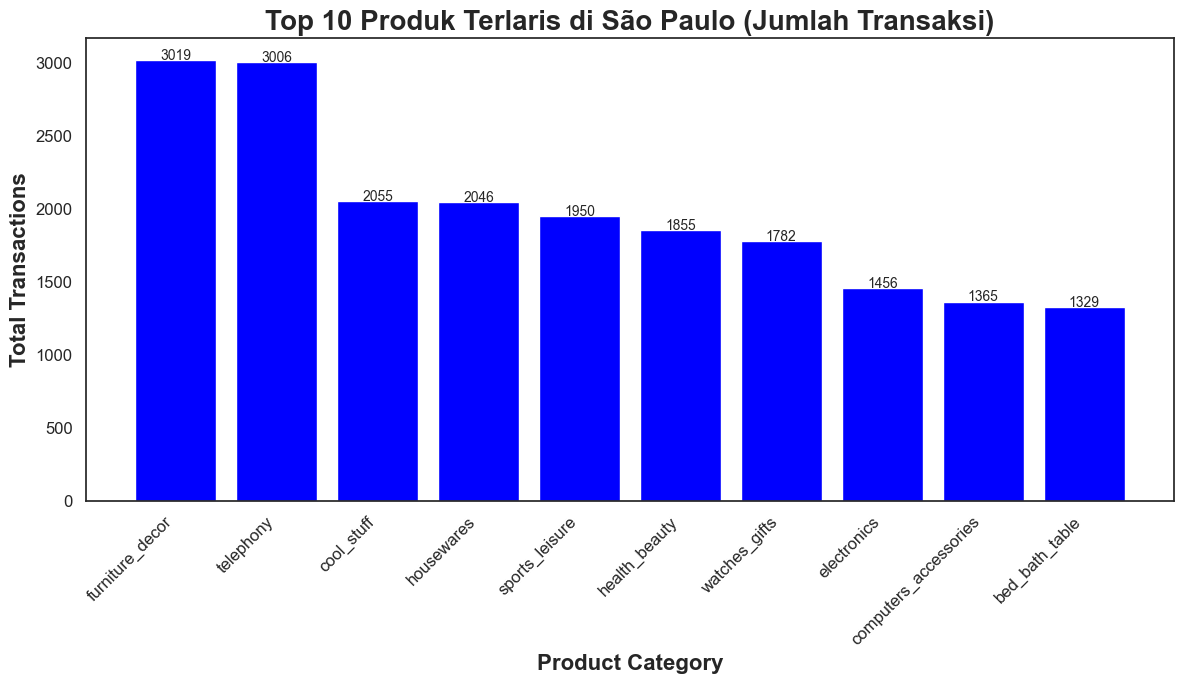

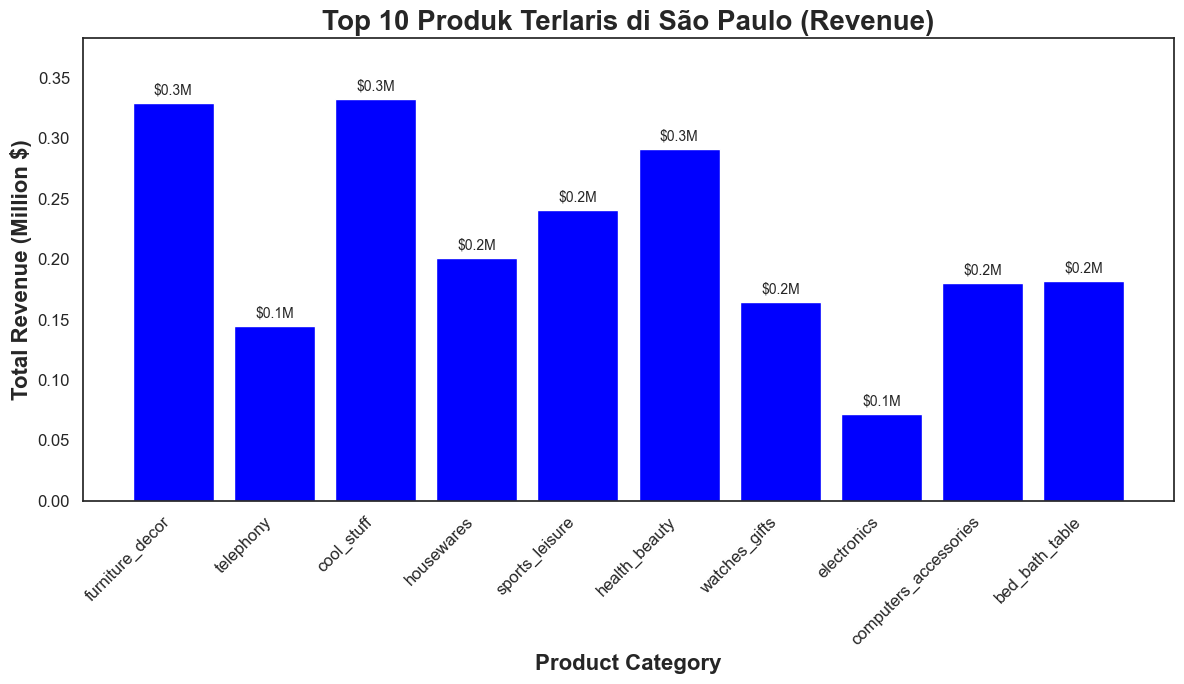

In [96]:
# Mencari top produk penjualan di sao paulo
import numpy as np
import matplotlib.pyplot as plt

# Filter data untuk seller di São Paulo
sao_paulo_data = df_merged[df_merged['seller_city'].str.upper() == 'SAO PAULO']

# Hitung jumlah transaksi per kategori produk
top_products_sp = sao_paulo_data.groupby('product_category_name_english')['product_id'].count().reset_index()
top_products_sp.rename(columns={'product_id':'total_transactions'}, inplace=True)  # rename kolom yang benar

# Hitung total revenue per kategori produk
top_products_sp_revenue = sao_paulo_data.groupby('product_category_name_english')['revenue'].sum().reset_index()
top_products_sp_revenue.rename(columns={'revenue':'total_revenue'}, inplace=True)

# Gabungkan kedua data
top_products_sp = top_products_sp.merge(top_products_sp_revenue, on='product_category_name_english')

# Ambil top 10 kategori berdasarkan total_transactions
top_products_sp = top_products_sp.sort_values(by='total_transactions', ascending=False).head(10)
print(top_products_sp)

# Visualisasi side-by-side
import matplotlib.pyplot as plt

# --- Chart 1: Total Transactions ---
plt.figure(figsize=(12,7))
plt.bar(top_products_sp['product_category_name_english'], 
        top_products_sp['total_transactions'], 
        color='blue')

# Tambahkan angka di atas bar
for i, val in enumerate(top_products_sp['total_transactions']):
    plt.text(i, val + 2, f"{val}", ha='center', fontsize=10)

plt.title("Top 10 Produk Terlaris di São Paulo (Jumlah Transaksi)", fontsize=20, fontweight='bold')
plt.xlabel("Product Category", fontsize=16, fontweight='bold')
plt.ylabel("Total Transactions", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


# --- Chart 2: Total Revenue ---
plt.figure(figsize=(12,7))
bars = plt.bar(top_products_sp['product_category_name_english'], 
               top_products_sp['total_revenue']/1_000_000, 
               color='blue')

# Tambahkan angka di atas bar
for i, val in enumerate(top_products_sp['total_revenue']/1_000_000):
    plt.text(i, val + (max(top_products_sp['total_revenue']/1_000_000)*0.02), 
             f"${val:,.1f}M", ha='center', fontsize=10)

plt.title("Top 10 Produk Terlaris di São Paulo (Revenue)", fontsize=20, fontweight='bold')
plt.xlabel("Product Category", fontsize=16, fontweight='bold')
plt.ylabel("Total Revenue (Million $)", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Tambahkan margin atas biar teks tidak keluar
plt.ylim(0, max(top_products_sp['total_revenue']/1_000_000)*1.15)

plt.tight_layout()
plt.show()

Top 10 Customer yang paling sering melakukan review:
                     customer_unique_id  total_reviews
57616  9a736b248f67d166d2fbb006bcb877c3             75
41719  6fbc7cdadbb522125f4b27ae9dee4060             38
93070  f9ae226291893fda10af7965268fb7f6             35
51801  8af7ac63b2efbcbd88e5b11505e8098a             29
32362  569aa12b73b5f7edeaa6f2a01603e381             26
49834  85963fd37bfd387aa6d915d8a1065486             24
74713  c8460e4251689ba205045f3ea17884a1             24
81759  db1af3fd6b23ac3873ef02619d548f9c             24
31409  5419a7c9b86a43d8140e2939cd2c2f7e             24
81116  d97b3cfb22b0d6b25ac9ed4e9c2d481b             24


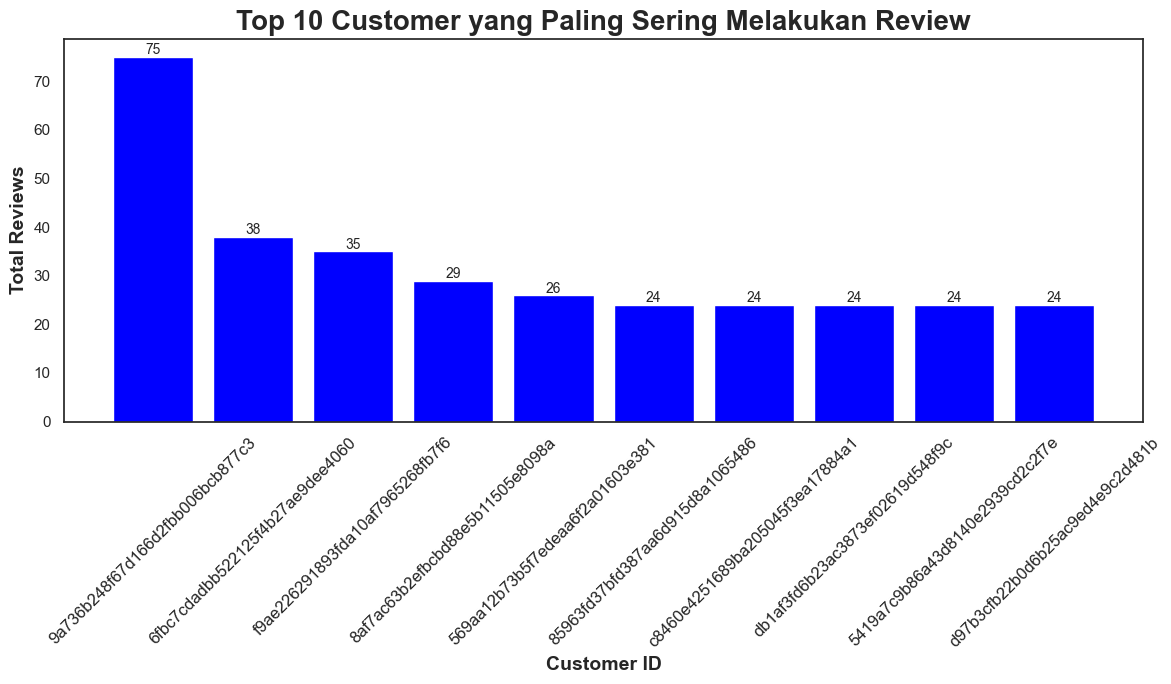

In [98]:
# Mencari customer yang sering melakukan review

# Pastikan review_id ada (jika ada review)
df_reviews = df_merged.dropna(subset=['review_id'])

# Hitung jumlah review per customer
customer_review_count = df_reviews.groupby('customer_unique_id')['review_id'].count().reset_index()
customer_review_count.rename(columns={'review_id':'total_reviews'}, inplace=True)

# Urutkan dari yang paling sering
top_reviewers = customer_review_count.sort_values(by='total_reviews', ascending=False).head(10)
print("Top 10 Customer yang paling sering melakukan review:")
print(top_reviewers)

# Optional: visualisasi
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(top_reviewers['customer_unique_id']))
plt.figure(figsize=(12,7))
bars = plt.bar(x, top_reviewers['total_reviews'], color='blue')

# Tambahkan angka di atas bar
for i, val in enumerate(top_reviewers['total_reviews']):
    plt.text(i, val + 0.5, str(val), ha='center', fontsize=10)

plt.xticks(x, top_reviewers['customer_unique_id'], rotation=45, fontsize=12)
plt.xlabel('Customer ID', fontsize=14, fontweight='bold')
plt.ylabel('Total Reviews', fontsize=14, fontweight='bold')
plt.title('Top 10 Customer yang Paling Sering Melakukan Review', fontsize=20, fontweight='bold')

# Hapus grid
plt.grid(False)

plt.tight_layout()
plt.show()

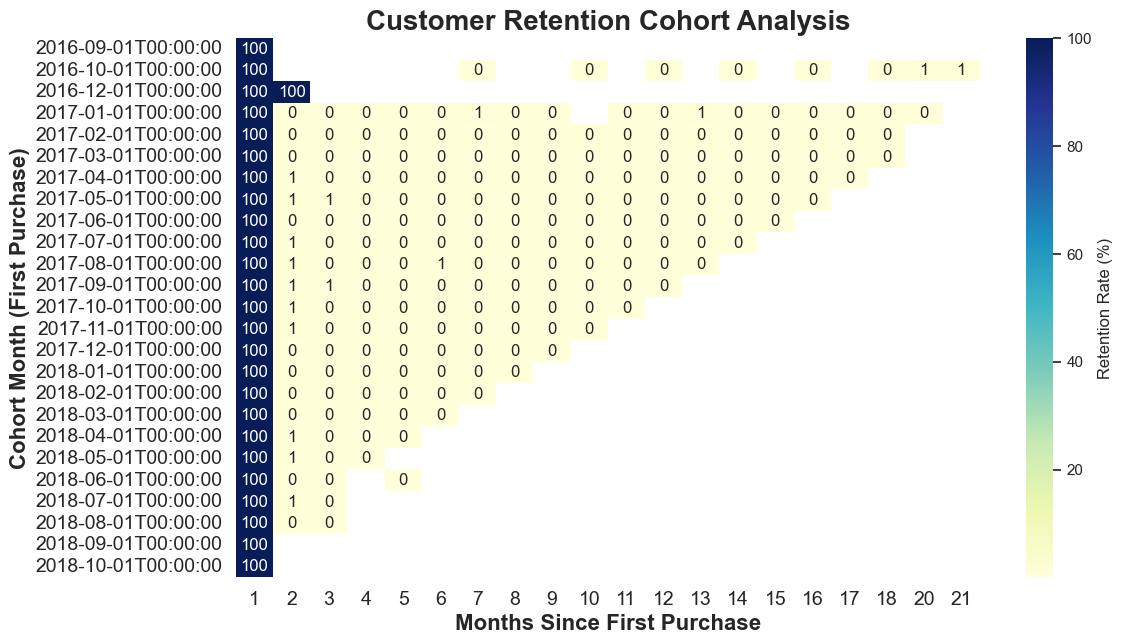

Persentase pelanggan yang pernah repeat order: 3.09%


In [108]:
# --- COHORT RETENTION ANALYSIS---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan timestamp sudah datetime
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])

# Ambil bulan order (format YYYY-MM)
df_merged['order_month'] = df_merged['order_purchase_timestamp'].values.astype('datetime64[M]')

# Tentukan cohort: bulan pertama seorang customer belanja
df_merged['cohort_month'] = df_merged.groupby('customer_unique_id')['order_month'].transform('min')

# Hitung index bulan relatif (berapa bulan sejak cohort pertama)
def get_date_int(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    return year, month

order_year, order_month = get_date_int(df_merged, 'order_month')
cohort_year, cohort_month = get_date_int(df_merged, 'cohort_month')

# Selisih bulan
df_merged['cohort_index'] = (order_year - cohort_year) * 12 + (order_month - cohort_month) + 1

# Hitung jumlah unique customer tiap cohort & index
cohort_data = df_merged.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].nunique().reset_index()

# Buat pivot table
cohort_pivot = cohort_data.pivot(index='cohort_month',
                                 columns='cohort_index',
                                 values='customer_unique_id')

# Hitung retention (dibagi cohort size bulan pertama)
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0) * 100

# --- VISUALISASI HEATMAP ---
plt.figure(figsize=(12, 7))
sns.heatmap(
    retention,
    annot=True,
    fmt='.0f',   # angka bulat
    cmap='YlGnBu',
    cbar_kws={'label': 'Retention Rate (%)'}
)

plt.title("Customer Retention Cohort Analysis", fontsize=20, fontweight='bold')
plt.xlabel("Months Since First Purchase", fontsize=16, fontweight='bold')
plt.ylabel("Cohort Month (First Purchase)", fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# --- CEK PERSENTASE REPEAT ORDER ---
repeat_customers = df_merged.groupby('customer_unique_id')['order_id'].nunique()
repeat_ratio = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100

print(f"Persentase pelanggan yang pernah repeat order: {repeat_ratio:.2f}%")


# Penjelasan
- Dari seluruh customer unik di dataset, hanya sekitar 3 dari 100 customer yang melakukan repeat order (belanja lebih dari sekali).
- Sangat memungkinkan apabila heatmap cohort retention kamu angkanya kecil (mayoritas 0%, hanya sedikit 1–3%).

# Insight:
- Customer Acquisition tinggi → banyak yang coba belanja sekali.
- Customer Retention sangat rendah → hampir semua customer tidak kembali untuk belanja berikutnya.
- Fokus strategi seharusnya pada customer retention program (contoh: loyalty program, promo repeat order, personalisasi rekomendasi produk).

# Analisis Temuan

1. Customer Retention Rendah
- Hanya ±3% pelanggan yang melakukan repeat purchase.
- Mayoritas pelanggan hanya sekali beli → sulit membangun loyalitas.

2. Konsentrasi Pelanggan di Kota Besar
- São Paulo & Rio de Janeiro menyumbang revenue terbesar.
- Pasar daerah lain masih belum tergarap optimal.

3. Perilaku Order
- Order puncak di Mei (Hari Ibu) & Agustus (Hari Ayah).
- Secara harian, order tinggi di weekdays (Senin–Selasa).
- Jam tertinggi pukul 10.00–16.00 → waktu aktif belanja online.

4. Kategori Produk
- Konsisten penjualan terbaik: Bed_Bath_Table, Health_Beauty, Housewares.
- Produk event-based: Garden_Tools (Hari Ibu), Cool_Stuff & Hari Ayah

5. Customer Reviews
- 76.9% satisfied vs 23.2% not satisfied.
- Faktor utama ketidakpuasan: keterlambatan pengiriman, produk defect, seller service buruk.

6. Revenue Growth
- Revenue naik dari 2017 (7.5M) ke 2018 (8.9M).
- Artinya ada potensi pertumbuhan yang kuat, tapi masih belum optimal karena retention rendah.



# Rekomendasi

In [ ]:
# Kesimpulan Strategis
 Untuk meningkatkan penjualan & memperkuat posisi Olist:

Fokus utama: tingkatkan retention rate → karena biaya akuisisi customer baru jauh lebih mahal.
Pendorong pertumbuhan: event-based campaign & kategori core (bed_bath_table + health_beauty).
Pencegah churn: optimasi logistik, kontrol kualitas seller, & customer support.